# ▷ 바로가기 이동

### 1. [LMS Node Review](#14-1.-들어가며)

### 2. [Exploration Project 14. 트랜스포머로 만드는 대화형 챗봇](#exploration-project-14)

바로가기 기능은 local에서 동작

<hr>

&nbsp;

### 14-1. 들어가며

#### 대화형 챗봇이란?


인공지능이라고 할 때 처음 떠오르는 것은 무엇인가요? 인간의 언어를 이해하고 인간과 자연어로 대화할 수 있는 기계를 우리는 자연스럽게 떠올리게 됩니다. 이미 시리나 구글 어시스턴트 등을 사용하는 것이 어색하지 않게 되었지요. 하지만 우리가 주변에서 흔히 볼 수 있는 챗봇은 모두 대화형인 것은 아닙니다.

- [챗봇의 5가지 대표 유형](https://tonyaround.com/%ec%b1%97%eb%b4%87-%ea%b8%b0%ed%9a%8d-%eb%8b%a8%ea%b3%84-%ec%b1%97%eb%b4%87%ec%9d%98-5%ea%b0%80%ec%a7%80-%eb%8c%80%ed%91%9c-%ec%9c%a0%ed%98%95-%ec%a2%85%eb%a5%98/)

위 참고 자료를 읽어보면, 챗봇에는 인간과 자연어로 대화를 주고받는 대화형 챗봇 이외에도, 정해진 트리형 메뉴 구조를 따라가는 트리형(버튼) 챗봇, 추천형 챗봇, 시나리오형 챗봇이 있고, 이들을 결합한 결합형 챗봇이 있다고 합니다. 대화형을 제외하면 사실상 챗봇은 대화형 UX를 가졌지만 본질적으로는 검색엔진이거나, 혹은 음성 ARS를 대화형 UX에 옮겨놓은 것이라 할 수 있습니다.

하지만 대화형 챗봇이 아니라면 챗봇이 가지는 한계는 명확합니다. 규칙 기반으로 구현된 챗봇은 사전에 정해진 말만 알아듣고 반응할 수 있는데, 진정한 챗봇의 가치는 사용자가 어떤 말을 하더라도 알아듣고 적절히 대응할 수 있는 자유도에 있기 때문입니다. 딥러닝을 통한 자연어처리 기술이 새로운 가능성을 보여주자, 사람들은 챗봇이 가져올 혁명적인 변화에 새삼 기대감을 가지기 시작했습니다.



#### 챗봇과 딥러닝


하지만 우리 주변에서 볼 수 있는 챗봇이 그다지 스마트하다는 느낌을 주지 않는 것은 왜일까요? 챗봇은 어떻게 발전해 온 것일까요?



- [챗봇 역사의 모든 것](https://blog.performars.com/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-%EC%B1%97%EB%B4%87chatbot-%EC%B1%97%EB%B4%87-%EC%97%AD%EC%82%AC%EC%9D%98-%EB%AA%A8%EB%93%A0-%EA%B2%83)

위 참고 자료를 읽어보면, 챗봇에 대한 초창기의 기대, 한계점, 최근 BERT 등의 pretrained model의 발전 이후의 새로운 기대감으로 이어지는 챗봇의 간략한 역사를 확인해 볼 수 있습니다. 인간보다 정확하게 퀴즈를 풀어내는 BERT, ALBERT 등은 모두 트랜스포머(Transformer)라는 모델을 활용하여 pretrain을 적용한 것들입니다. 트랜스포머 이전에도 LSTM 등 RNN 기반의 딥러닝 모델, 그리고 이를 인코더-디코더 구조로 엮은 seq2seq 모델 등을 활용하여 챗봇 제작을 시도해 왔습니다. 그러나 2017년에 발표된 트랜스포머는 병렬처리에 불리한 LSTM에 비해 훨씬 뛰어난 처리 속도를 보이면서도 LSTM 등 RNN 모델이 가지는 장기 의존성에 강건한 특징 때문에 매우 긴 길이의 문장을 처리하는 데 유리하다는 좋은 특징을 보여주었고, 이후 자연어처리 분야의 혁신을 가져온 발판이 되어 주었습니다.

그래서 오늘은 트랜스포머 모델을 기반으로 한 인코더-디코더 구조를 바탕으로 챗봇을 제작해 보려고 합니다. 이미 인코더-디코더 구조에 대해서는 seq2seq, AutoEncoder, GAN 등에서 여러 번 경험해 보셨을 것입니다. seq2seq 모델을 기반으로 하는 번역기를 생각해 봅시다. 영어를 한국어로 번역하는 모델은 영어 문장을 인코더로 해석하여 나온 벡터를 디코더의 인풋(input)으로 삼아 디코더에서 한국어 문장을 생성하게 합니다. 그런 것처럼 사용자의 입력 문장을 인코더로 해석하고, 적절한 답변 문장을 디코더가 생성하도록 구성할 수 있을 것입니다.

물론 더욱 좋은 성능을 내기 위해서는 엄청나게 많은 코퍼스로 학습시킨 pretrained model을 활용하는 것이 필요합니다. 오늘 우리가 다룰 데이터의 규모로 충분히 스마트한 챗봇을 만들기는 어려울 것입니다. 그러나 그런 챗봇을 만들 수 있는 모델의 기본 구조를 알아보는 데는 충분히 도움이 될 것입니다.



__학습 목표__

<hr>

- 트랜스포머의 인코더 디코더 구조 이해하기


- 내부 단어 토크나이저 사용하기


- 셀프 어텐션 이해하기


- 한국어에도 적용해보기

&nbsp;

### 14-2. 트랜스포머와 인코더 디코더


#### 인코더와 디코더 구조 되짚어보기

<hr>

번역기를 만드는 데 사용한 대표적인 모델인 인코더와 디코더 구조를 되짚어 봅시다.

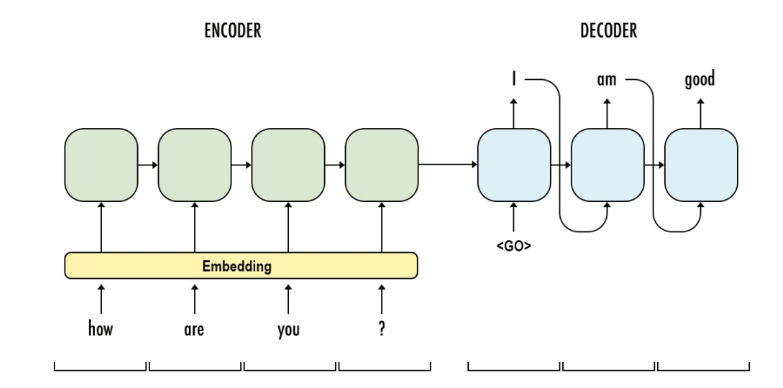

번역기는 인코더와 디코더 두 가지 아키텍처로 구성돼 있었습니다. 인코더에 입력 문장이 들어가고, 디코더는 이에 상응하는 출력 문장을 생성합니다. 그리고 이를 훈련한다는 것은 결국 입력 문장과 출력 문장 두 가지 병렬 구조로 구성된 데이터셋을 훈련한다는 의미였습니다.



__훈련 데이터셋의 구성(번역)__


- 입력 문장 : '저는 학생입니다.'


- 출력 문장 : 'I am a student'


이런 병렬적으로 구성된 데이터셋을 인코더와 디코더로 학습하는 경우는 사실 번역기에만 한정되지는 않습니다. 질문에 대해서 대답을 하도록 구성된 데이터셋을 인코더와 디코더 구조로 학습한다면, 주어진 질문에 답변할 수 있는 챗봇 또한 만들 수 있을 테니까요.

__훈련 데이터셋의 구성(질문-답변)__


- 입력 문장 : '오늘의 날씨는 어때?'


- 출력 문장 : '오늘은 매우 화창한 날씨야'

#### 트랜스포머의 인코더와 디코더

<hr>

트랜스포머 또한 번역기와 마찬가지로 기본적으로 인코더와 디코더 구성을 가지고 있습니다. 입력 문장을 넣으면 출력 문장을 내뱉고 있지요.

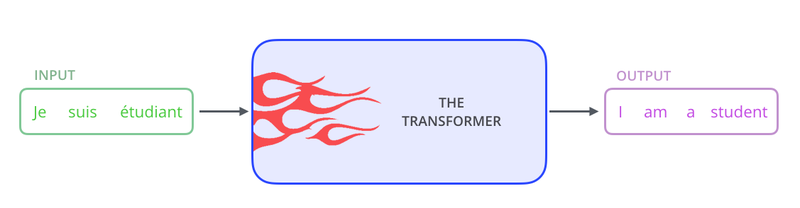<br>
【출처：[http://jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/)】

위의 블랙박스로 가려져 있는 트랜스포머의 내부 구조를 열어보면 아래와 같습니다!

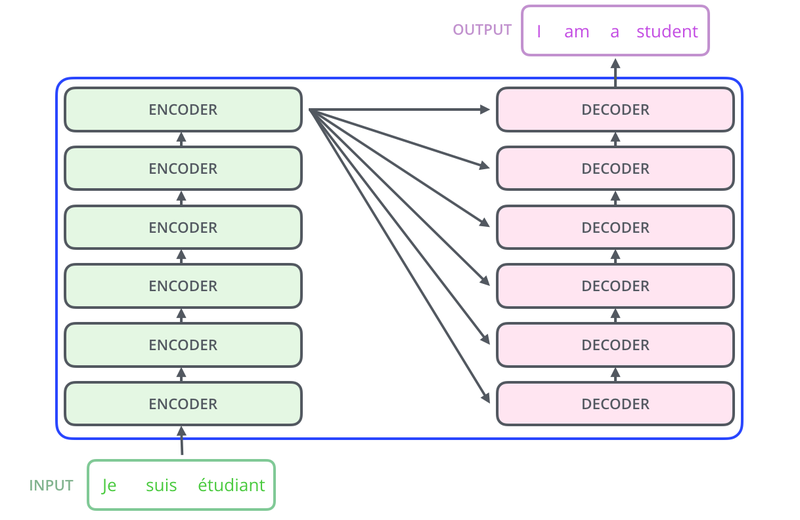<br>
【출처：[http://jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/)】

초록색 색깔의 도형을 인코더 층(Encoder layer), 핑크색 색깔의 도형을 디코더(Decoder layer)라고 하였을 때, 입력 문장은 누적해 쌓아 올린 인코더의 층을 통해서 정보를 뽑아내고, 디코더는 누적해 쌓아 올린 디코더의 층을 통해서 출력 문장의 단어를 하나씩 만들어가는 구조를 갖고 있어요.

그리고 그 내부를 조금 더 확대해 보면 아래와 같이 톱니바퀴처럼 맞물려 돌아가는 여러 가지 부품들로 구성돼 있습니다.



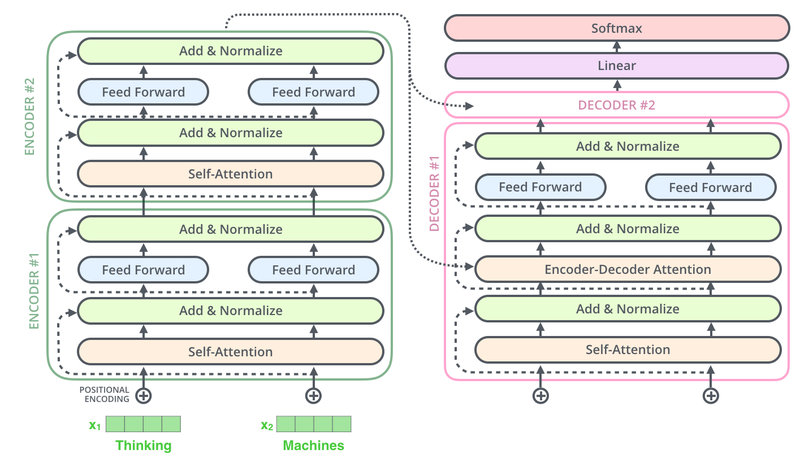<br>
【출처：[http://jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/)】

위의 그림에서 적힌 모듈들을 하나씩 정리해 볼까요?


&nbsp;

### 14-3. 트랜스포머의 입력 이해하기


먼저 앞으로 진행하면서 필요한 패키지를 임포트하겠습니다!



In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("슝=3")

슝=3


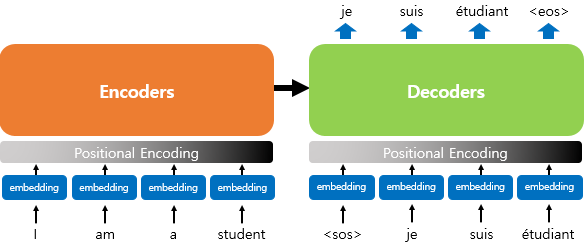

많은 자연어 처리 모델들은 텍스트 문장을 입력으로 받기 위해 단어를 임베딩 벡터로 변환하는 벡터화 과정을 거칩니다. 트랜스포머 또한 그 점에서는 다른 모델들과 다르지 않습니다. 하지만 트랜스포머 모델의 입력 데이터 처리에는 RNN 계열의 모델들과 다른 점이 한 가지 있습니다. 바로 임베딩 벡터에 어떤 값을 더해준 뒤에 입력으로 사용한다는 점입니다. 그 값은 바로 위 그림에서의 `포지셔널 인코딩(positional Encoding)` 에 해당하는 부분입니다.

위 그림에서 인코더의 입력 부분을 조금 더 확대해 본다면 이런 그림이 나오겠죠?



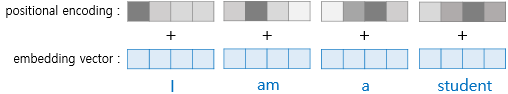

이렇게 해주는 이유는 트랜스포머는 입력을 받을 때, 문장에 있는 단어들을 1개씩 순차적으로 받는 것이 아니라, 문장에 있는 모든 단어를 한꺼번에 입력으로 받기 때문입니다. 트랜스포머가 RNN과 결정적으로 다른 점이 바로 이 부분입니다. RNN에는 어차피 문장을 구성하는 단어들이 어순대로 모델에 입력되므로, 모델에게 따로 어순 정보를 알려줄 필요가 없었습니다. 그러나 문장에 있는 모든 단어를 한꺼번에 문장 단위로 입력받는 트랜스포머는 자칫 'I ate lunch'와 'lunch ate I'를 구분할 수 없을지도 모릅니다. 그래서 같은 단어라도 그 단어가 문장의 몇 번째 어순으로 입력되었는지를 모델에 추가로 알려 주기 위해, 단어의 임베딩 벡터에다가 위치 정보를 가진 벡터(Positional Encoding) 값을 더해서 모델의 입력으로 삼는 것이지요!



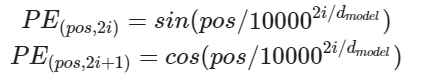

포지셔널 인코딩의 벡터값은 위의 수식에 의해서 정해집니다. 사인 함수와 코사인 함수의 그래프를 상기해보면 요동치는 값의 형태를 생각해 볼 수 있는데, 트랜스포머는 사인 함수와 코사인 함수의 값을 임베딩 벡터에 더해줌으로써 단어의 순서 정보를 더하여 줍니다.



위의 두 함수에는 $pos, i, d_{model}$ 등 생소한 변수들이 있습니다. 위의 함수를 이해하기 위해서는 위에서 본 임베딩 벡터와 포지셔널 인코딩의 덧셈은 사실 임베딩 벡터가 모여 만들어진 문장 벡터 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어진다는 점을 이해해야 합니다.

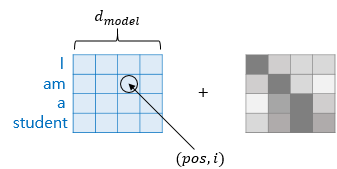

~~~
Q1. 한 문장에 같은 단어 A가 여러 번 등장하였다고 가정해보겠습니다. 임베딩 문장 행렬에 포지셔널 인코딩을 해주었을 때와 해주지 않았을 때, 트랜스포머가 임베딩 문장 행렬 내의 다수의 A 단어 벡터로부터 얻을 수 있는 정보의 차이는 어떤 것이 있을까요?


같은 단어라고 하더라도 포지셔널 인코딩을 해준 경우에는 임베딩 벡터값이 달라지므로, 같은 단어라고 해도 각각 다른 위치에 등장했다는 사실을 모델에 알려줄 수 있습니다.
~~~

포지셔널 행렬을 직접 구현해서 눈으로 확인해 봅시다!



In [2]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

슝=3


행의 크기가 50, 열의 크기가 512인 행렬을 그려봅시다. 이를테면, 최대 문장의 길이가 50이고 워드 임베딩 차원을 512로 하는 모델의 입력 벡터 모양이 이와 같을 것입니다.



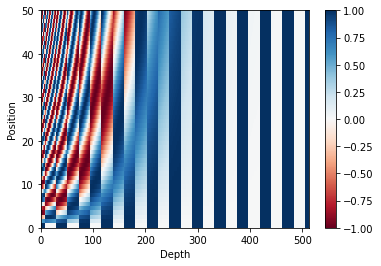

In [3]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

~~~
Q2. 임베딩 벡터의 차원이 256이고 최대 문장의 길이가 30인 텍스트를 입력으로 하는 트랜스포머를 구현한다고 하였을 때, 적절한 포지셔널 인코딩 행렬의 크기를 추측해보고 위에 구현한 포지셔널 인코딩 레이어를 사용해 표현해 보세요.


위의 코드에서 50, 512 대신 30, 256을 입력으로 하여 행렬을 만들면 정답입니다. 즉 PositionalEncoding(30,256)로 표현할 수 있습니다.
~~~

실제 논문에서 제시된 그림에서는 다음과 같이 포지셔널 인코딩을 표현하였습니다.



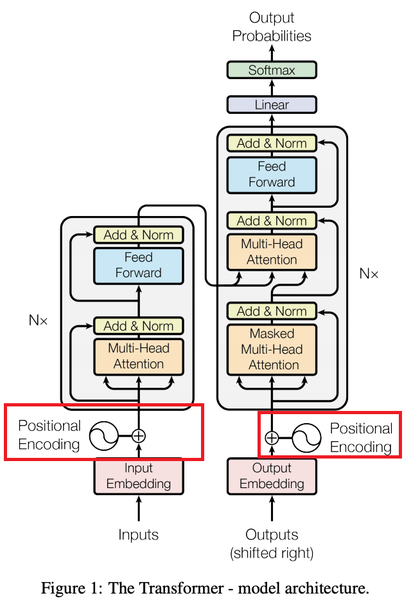

&nbsp;

### 14-4. 어텐션? 어텐션!


트랜스포머의 인코더와 디코더에서 사용하고 있는 개념인 어텐션에 대해서 알아보겠습니다!



#### 어텐션이란?

<hr>

어텐션 메커니즘을 그림으로 표현한다면 아래와 같이 표현할 수 있습니다.

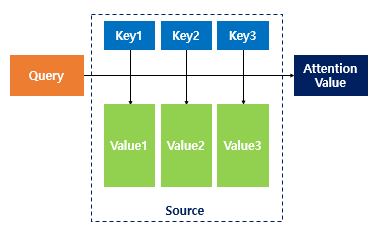

어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구합니다. 그리고 구해낸 이 유사도를 키(Key)와 맵핑되어있는 각각의 '값(Value)'에 반영해 줍니다. 그리고 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 어텐션 값(Attention Value) 라고 합니다.



#### 트랜스포머에서 사용된 어텐션

<hr>

트랜스포머는 총 세 가지의 어텐션을 사용합니다.

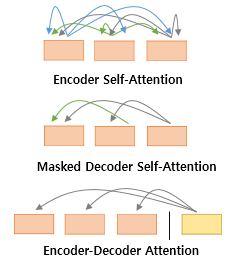


첫 번째 그림인 __인코더 셀프 어텐션__은 인코더에서 이루어지고,


두 번째 그림인 __디코더 셀프 어텐션__은 디코더에서 이루어지며,


세 번째 그림인 __인코더-디코더 어텐션__ 또한 디코더에서 이루어집니다.

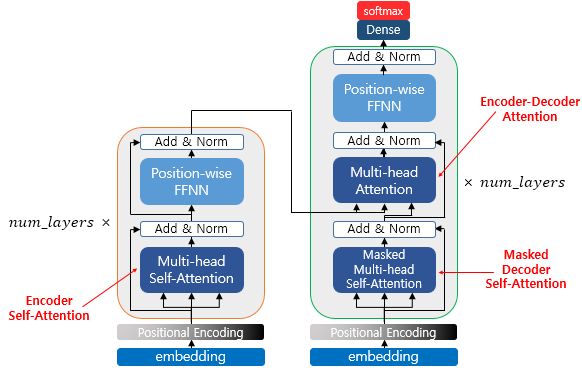

위 그림은 트랜스포머의 전체적인 아키텍처에서 각 어텐션이 위치한 곳을 보여줍니다.



트랜스포머의 어텐션 함수에 사용되는 __쿼리(Query), 키(Key), 밸류(Value)__ 는 기본적으로 __'단어 (정보를 함축한) 벡터'__ 입니다.



단, 여기서 __'단어 벡터'__ 란 초기 입력으로 사용되었던 임베딩 벡터가 아니고, 트랜스포머의 여러 연산을 거친 후의 __단어 벡터__ 입니다.



그럼 위 세 가지 어텐션이 하는 일을 조금 더 자세히 알아보겠습니다.



- __인코더 셀프 어텐션__ : 인코더의 입력으로 들어간 문장 내 단어들이 서로 유사도를 구한다.


- __디코더 셀프 어텐션__ : 단어를 1개씩 생성하는 디코더가 이미 생성된 앞 단어들과의 유사도를 구한다.


- __인코더-디코더 어텐션__ : 디코더가 잘! 예측하기 위해서 인코더에 입력된 단어들과 유사도를 구한다.

무려 세 가지 어텐션 중 두 가지가 __셀프 어텐션__인데요.



자, 그럼 대체 셀프 어텐션이 어떤 의미를 가지고 있으며 트랜스포머에서 왜 중요한지 이해해 볼까요?



#### 셀프 어텐션(Self Attention)

<hr>

셀프 어텐션이란 유사도를 구하는 대상이 다른 문장의 단어가 아니라 현재 문장 내의 단어들이 서로 유사도를 구하는 경우를 말합니다. 가령, 위에서 언급한 인코더-디코더 어텐션은 서로 다른 단어 목록(인코더 내 단어와 디코더 내 단어) 사이에서 유사도를 구하기에 셀프 어텐션이 아닙니다.

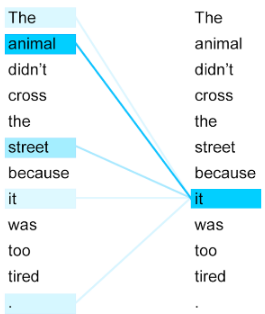<br>
[https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)

위의 그림은 [구글 AI 블로그 포스트](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)에서 가져왔습니다. 위의 예시 문장을 번역하면 __'그 동물은 길을 건너지 않았다. 왜냐하면 그것은 너무 피곤하였기 때문이다.'__ 라는 의미가 됩니다. 그런데 여기서 __그것(it)__ 에 해당하는 것은 과연 __길(street)__ 일까요? __동물(animal)__ 일까요?

우리는 동물이라는 것을 쉽게 알 수 있지만, 기계는 그렇지 않습니다. 하지만 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하여 __그것(it)__ 이 __동물(animal)__ 과 연관되었을 확률이 높다는 것을 찾아냅니다. 그런데 한 가지 의문이 듭니다. 유사도는 어떻게 구할까요?

&nbsp;

### 14-5. 스케일드 닷 프로덕트 어텐션


앞서 어텐션이 단어들 간의 유사도를 구하는 메커니즘이라고 했었죠?

그렇다면 유사도를 구하는 방법이 있을 겁니다.

트랜스포머에서는 어텐션 값을 구하는 방법으로 아래와 같은 수식을 사용했습니다.

$$Attention(Q,K,V)=softmax \left({QK^{T}\over\sqrt d_{k}} \right)V$$

$Q, K, V$ 는 각각 쿼리(Query), 키(Key), 값(Value)를 나타냅니다.

앞서 언급했던 어텐션 함수의 정의와 결괏값을 다시 상기해봅시다.



어텐션 함수는 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 __유사도__를 각각 구합니다. 그리고 구해낸 이 유사도를 키와 맵핑되어있는 각각의 '값(Value)'에 반영해 줍니다. 그리고 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐주면 이를 최종 결과인 __어텐션 값(Attention Value)__ 라고 합니다.



위 정의와 아래 내용 세 가지만 기억하면 수식을 그림으로 정리할 수 있습니다.



1. __Q, K, V__는 단어 벡터를 행으로 하는 문장 행렬이다.


2. 벡터의 __내적(dot product)__ 은 벡터의 __유사도__를 의미한다.


3. 특정 값을 분모로 사용하는 것은 값의 크기를 조절하는 스케일링(Scaling)을 위함이다.


<hr>

우선 $Q$ 와 $K$ 의 전치 행렬을 곱하는 것을 그림으로 표현하면 다음과 같습니다.

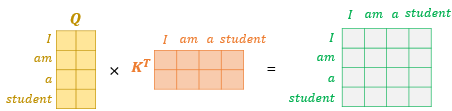

문장 행렬 $Q$ 와 문장 행렬 $K$ 를 곱하면 위의 그림과 같은 초록색 행렬을 얻을 수 있습니다.

위 초록색 행렬이 의미하는 값은 무엇일까요? 예를 들어 'am' 행과 'student' 열의 값은 $Q$ 행렬에 있던 'am' 벡터와 $K$ 행렬에 있던 'student 벡터'의 내적값을 의미합니다. 결국 각 단어 벡터의 유사도가 모두 기록된 유사도 행렬이 되는 것이지요!

<hr>

이 유사도 값을 스케일링 해주기 위해서 행렬 전체를 특정 값으로 나눠주고, 유사도를 0 과 1 사이의 값으로 Normalize해주기 위해서 소프트맥스 함수를 사용합니다. 여기까지가 $Q$ 와 $K$ 의 유사도를 구하는 과정이라고 볼 수 있겠습니다. 여기에 문장 행렬 $V$ 와 곱하면 __어텐션 값(Attention Value)__ 를 얻습니다.

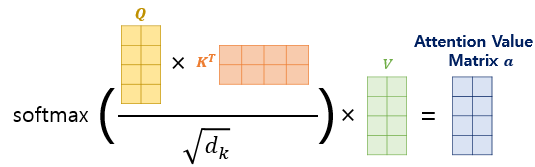

결국 이를 모두 하나의 그림으로 표현하면 위와 같습니다.



$$Attention(Q,K,V)=softmax \left({QK^{T}\over\sqrt d_{k}} \right)V$$

이 수식은 내적(dot product)을 통해 단어 벡터 간 유사도를 구한 후에, 특정 값을 분모로 나눠주는 방식으로 $Q$ 와 $K$ 의 유사도를 구하였다고 하여 __스케일드 닷 프로덕트 어텐션(Scaled Dot Product Attention)__ 이라고 합니다. 유사도를 구하는 방법이 스케일드 닷 프로덕트(scaled dot product)였기 때문에 이런 이름이 붙은 것이지요.

만약에 분모에 특정 값을 나눠주는 부분을 사용하지 않았다면 어텐션의 이름은 무엇일까요? 그 어텐션은 당연히 __닷 프로덕트 어텐션(dot product attention)__ 이라고 부릅니다.



#### 구현하기

<hr>

스케일드 닷 프로덕트 어텐션 함수를 구현해봅시다.

In [4]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

print("슝=3")

슝=3


이 글에서 앞으로 어텐션을 수행한다고 한다면, 스케일드 닷 프로덕트 어텐션을 의미합니다!




&nbsp;

### 14-6. 머리가 여러 개인 어텐션


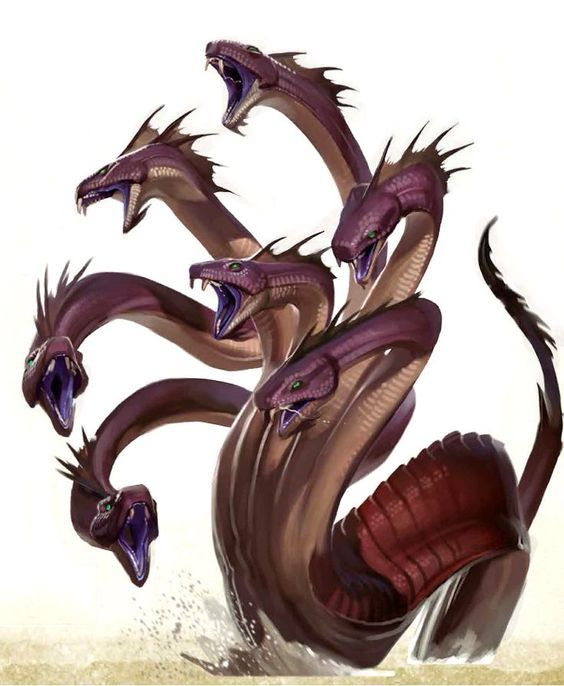<br>
【출처 : [https://br.pinterest.com/pin/462041243021541344/](https://br.pinterest.com/pin/462041243021541344/)】

그리스 로마 신화에 등장하는 히드라라는 괴물을 아시나요? 머리가 여러 개인 이 괴물은 여러 곳으로 동시에 시선을 둘 수 있었기 때문에 시선의 사각지대가 없어서 처치하기 어려운 괴물입니다. 결국 헤라클레스라는 영웅이 히드라의 머리를 하나씩 제거한 뒤에야 무찌를 수 있었는데요.



뜬금없이 갑자기 왜 히드라 얘기냐구요? 다른 비유를 하나 들어볼게요. 굉장히 어려운 문제가 가득한 시험지를 받았을 때 '혼자가 아니라 옆에서 누군가 같이 풀어준다면 좀 더 좋은 성적을 받을 텐데'하고 누구나 한 번쯤 상상해보았을 겁니다.



이런 이야기는 현실에서는 상상에 불과하지만, 기계가 할 수 있도록 해줄 수는 있습니다.



__병렬로 어텐션 수행하기__

<hr>

트랜스포머에서 `num_heads` 라는 변수는 기계가 몇 개의 똑똑한 머리를 사용할지, 다시 말해 병렬적으로 몇 개의 어텐션 연산을 수행할지를 결정하는 하이퍼파라미터입니다.

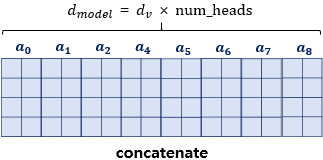

앞서 포지셔널 인코딩에서 `d_model` 은 임베딩 벡터의 차원이라고 언급한 바 있습니다. 결국 트랜스포머의 초기 입력인 문장 행렬의 크기는 문장의 길이를 행으로, `d_model` 을 열의 크기로 가집니다.

트랜스포머는 이렇게 입력된 문장 행렬을 `num_heads` 의 수만큼 쪼개서 어텐션을 수행하고, 이렇게 얻은 `num_heads` 의 개수만큼의 어텐션 값 행렬을 다시 하나로 concatenate합니다.

위의 그림은 `num_heads` 가 8개인 경우인데, 다시 concatenate하면서 열의 크기가 `d_model` 이 됩니다.



각자 문제지를 나눠서 푼 후에 마지막에 다시 결과를 합친다고 비유해볼 수도 있겠네요!



~~~
Q3. 논문에서 d_model은 512의 값을 가졌다고 하고, num_heads는 8의 값을 가졌다고 해요. 그렇다면, 연결하기 전 8개의 어텐션 값(Attention Value) 행렬의 열의 크기는 몇 차원이었을까요?


512/8 = 64
~~~



#### 멀티-헤드 어텐션

<hr>

이렇게 병렬로 어텐션을 수행하면 얻을 수 있는 효과는 무엇일까요?



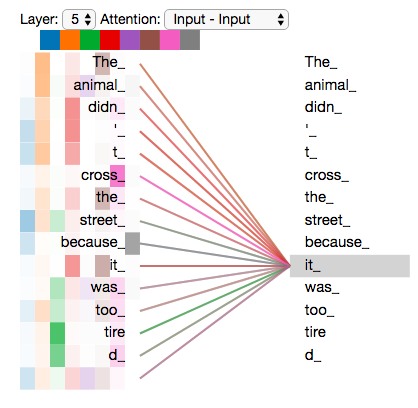<br>
【출처 : [http://jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/)】

위 그림은 `num_heads` 의 값이 8일 때, 병렬로 수행되는 어텐션이 서로 다른 셀프 어텐션 결과를 얻을 수 있음을 보여줍니다. 다시 말해 8개의 머리는 각각 다른 관점에서 어텐션을 수행하므로 한 번의 어텐션만 수행했다면 놓칠 수도 있던 정보를 캐치할 수 있습니다. 예를 들어 위 그림에서라면 `it_` 이라는 토큰이 `animal_` 과 유사하다고 보는 관점과 `street_` 과 유사하다고 보는 관점이 한꺼번에 모두 표현 가능하다는 뜻입니다.



이와 같이 어텐션을 병렬로 수행하는 것을 __멀티 헤드 어텐션__ 이라고 부릅니다.



#### 구현하기

<hr>

멀티 헤드 어텐션을 구현하면 다음과 같습니다.

내부적으로는 스케일드 닷 프로덕트 어텐션 함수를 호출합니다.

In [5]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs
print("슝=3")

슝=3


&nbsp;

### 14-7. 마스킹


__마스킹(Masking)__ 이란, 특정 값들을 가려서 실제 연산에 방해가 되지 않도록 하는 기법입니다.



트랜스포머에서는 어텐션을 위해서 크게 두 가지 마스킹을 사용한다고 하는데요.



#### 패딩 마스킹(Padding Masking)

<hr>

첫 번째 마스킹은 패딩 토큰(Padding token)을 이용한 방법입니다.

자연어 처리에서 패딩(Padding)이란 어떤 개념일까요?



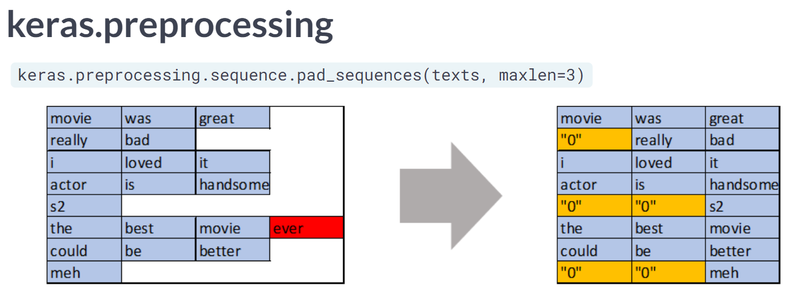

패딩은 문장의 길이가 서로 다를 때, 모든 문장의 길이를 동일하게 해주는 과정에서 정해준 길이보다 짧은 문장의 경우에는 숫자 0을 채워서 문장의 길이를 맞춰주는 자연어 처리 전처리 방법입니다.



위 그림은 케라스의 `pad_sequences()` 를 사용하여 패딩을 하는 과정을 시각화한 그림입니다.



그런데 사실 이렇게 주어진 숫자 0은 실제 의미가 있는 단어가 아니므로 실제 어텐션 등과 같은 연산에서는 제외할 필요가 있습니다. __패딩 마스킹__ 은 이를 위해 숫자 0인 위치를 체크합니다.



다음은 __패딩 마스킹__ 을 구현한 함수입니다.

In [6]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

슝=3


이 함수에 정수 시퀀스를 입력으로 하면, 이 함수는 숫자가 0인 부분을 체크한 벡터를 리턴합니다.



두 개의 정수 시퀀스를 입력으로 해보고, 각각 어떤 결과가 나오는지 보겠습니다.



In [7]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


두 정수 시퀀스에 대해서 각각 결과가 출력되는데, 오직 숫자가 0인 위치에서만 숫자 1이 나오고 숫자 0이 아닌 위치에서는 숫자 0인 벡터를 출력합니다.



어텐션 연산 시에 `패딩 마스킹` 을 참고하면 불필요하게 숫자 0을 참고하지 않게 할 수 있겠죠?



#### 룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기)

<hr>

순환 신경망, RNN과 트랜스포머는 문장을 입력받을 때 입력받는 방법이 전혀 다릅니다.

RNN은 __step__ 이라는 개념이 존재해서 각 __step__ 마다 단어가 순서대로 입력으로 들어가는 구조인 반면 트랜스포머의 경우에는 문장 행렬을 만들어 한 번에 행렬 형태로 입력으로 들어간다는 특징이 있습니다. 그리고 이 특징 때문에 추가적인 __마스킹(Masking)__ 을 필요합니다.



&nbsp;

__RNN__



RNN으로 다음 단어를 예측해가면서 문장을 생성해내는 과정을 보겠습니다.

다시 말해 RNN으로 디코더를 구현했을 경우입니다.

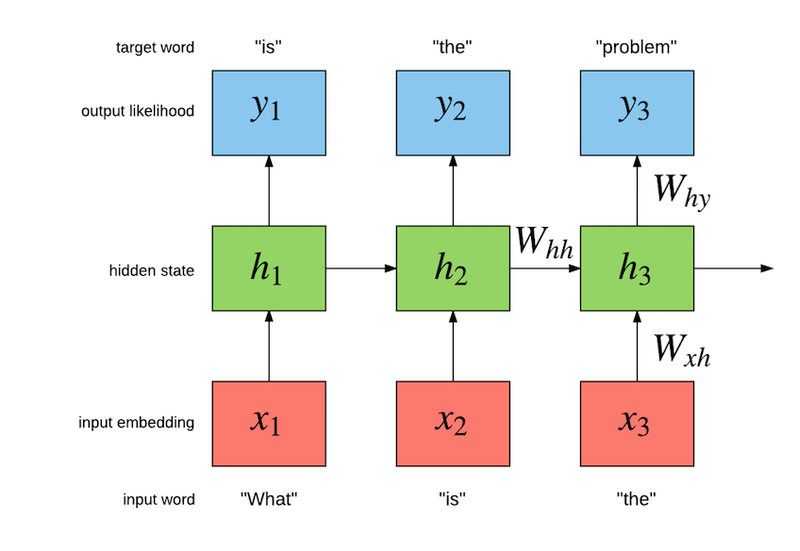<br>
[http://torch.ch/blog/2016/07/25/nce.html](http://torch.ch/blog/2016/07/25/nce.html)

RNN은 구조상으로 다음 단어를 만들어 갈 때, 자신보다 앞에 있는 단어들만 참고해서 다음 단어를 예측합니다. 위의 그림을 참고로 각 단계에서 다음 단어 예측 과정을 서술하면 다음과 같습니다.

__첫 번째 step__

현재까지의 입력 : what → 출력 : is



__두 번째 step__

현재까지의 입력 : what is → 출력 : the



__세 번째 step__

현재까지의 입력 : what is the → 출력 problem

&nbsp;

__트랜스포머__


하지만 트랜스포머의 경우, 전체 문장이 문장 행렬로 들어가기 때문에 위치와 상관없이 모든 단어를 참고해서 다음 단어를 예측할 수 있습니다. 하지만 사실 우리가 원하는 것은 이전 단어들로부터 다음 단어를 예측하는 훈련을 제대로 하는 것입니다. 따라서 이러한 문제를 해결하기 위해 자신보다 다음에 나올 단어를 참고하지 않도록 가리는 기법이 룩 어헤드 마스킹 기법입니다.

이 기법은 어텐션을 수행할 때, Query 단어 뒤에 나오는 Key 단어들에 대해서는 마스킹 합니다.



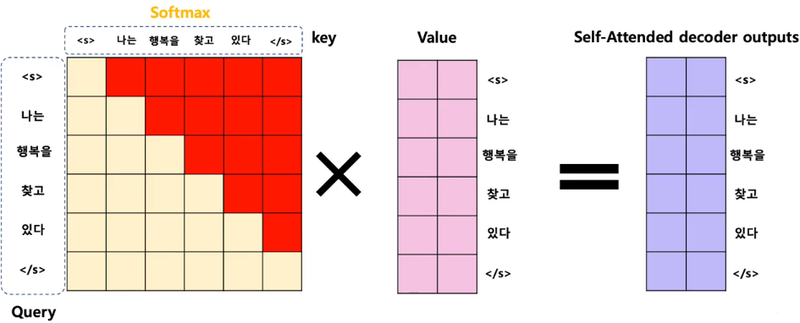<br>
[https://www.youtube.com/watch?v=xhY7m8QVKjo](https://www.youtube.com/watch?v=xhY7m8QVKjo)


위의 그림에서 빨간색으로 색칠된 부분은 마스킹을 표현하고 있습니다. 빨간색은 실제 어텐션 연산에서 가리는 역할을 하여 어텐션 연산 시에 현재 단어를 기준으로 이전 단어들하고만 유사도를 구할 수 있습니다. 행을 Query, 열을 Key로 표현된 행렬임을 감안하고 천천히 행렬을 살펴봅시다.



예를 들어 Query 단어가 '찾고'라고 한다면, 이 '찾고'라는 행에는 `<s>, <나는>, <행복을>, <찾고>` 까지의 열만 보이고 그 뒤 열은 아예 빨간색으로 칠해져 있습니다. 즉, 유사도를 구할 수 없도록 해놓았습니다. 저 빨간색 부분을 마스킹 함수로 구현하면 다음과 같습니다.



In [8]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")

슝=3


직접 입력을 넣어 테스트해 봅시다.



In [9]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


대각선의 형태로 숫자 1이 채워지는 것을 볼 수 있습니다. 그런데 이 마스킹과 패딩 마스킹은 별개이므로, 이 마스킹을 수행할 때 만약에 숫자 0인 단어가 있다면 이 또한 패딩 해야 합니다. 그래서 `create_look_ahead_mask()` 함수는 내부적으로 앞서 구현한 패딩 마스크 함수도 호출하고 있습니다.



숫자 0이 포함되었을 경우에도 테스트해 봅시다.



In [10]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


&nbsp;

### 14-8. 인코더


트랜스포머의 입력, 그리고 트랜스포머 내부에서 일어나는 어텐션에 대해서도 간단히 정리해봤습니다. 이제 트랜스포머의 인코더를 설계해 보겠습니다.



#### 인코더 층 만들기

<hr>

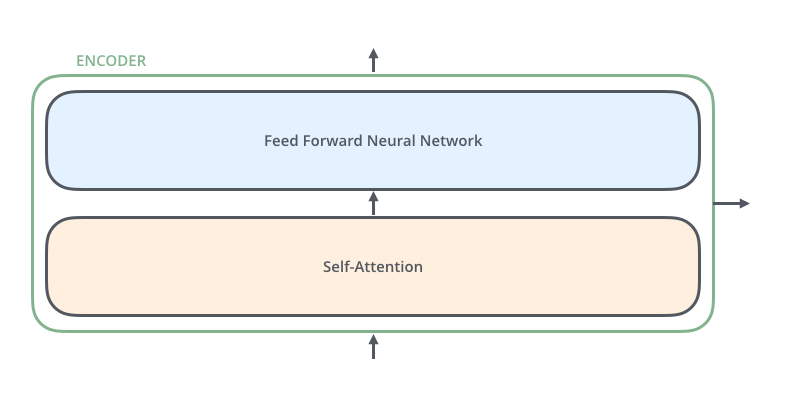<br>
【출처 : [http://jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/)】

하나의 인코더 층은 크게 총 2개의 서브 층(sublayer)으로 나누어집니다.

바로 __셀프 어텐션__ 과 __피드 포워드 신경망__ 입니다. 셀프 어텐션은 __멀티 헤드 어텐션__ 으로 병렬적으로 이루어집니다.

두 개의 서브 층을 가지는 하나의 인코더 층을 구현하는 함수는 다음과 같습니다. 함수 내부적으로 첫 번째 서브 층과 두 번째 서브 층을 구현하고 있습니다.



In [11]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


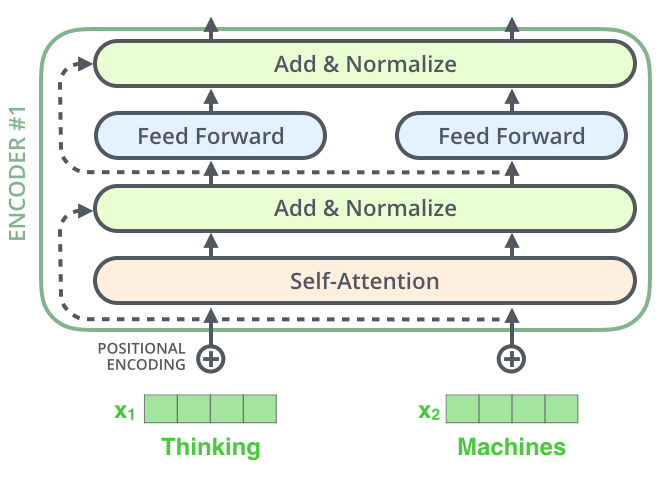<br>
【[출처 : http://jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/)】

#### 인코더 층을 쌓아 인코더 만들기

<hr>

이렇게 구현한 인코더 층을 __임베딩 층(Embedding layer)__ 과 __포지셔널 인코딩(Positional Encoding)__ 을 연결하고, 사용자가 원하는 만큼 인코더 층을 쌓음으로써 트랜스포머의 인코더가 완성됩니다.



인코더와 디코더 내부에서는 각 서브 층 이후에 훈련을 돕는 __Layer Normalization__ 이라는 테크닉이 사용되었습니다.

위 그림에서는 __Normalize__ 라고 표시된 부분에 해당됩니다.



트랜스포머는 하이퍼파라미터인 __num_layers__ 개수의 인코더 층을 쌓습니다. 논문에서는 총 6개의 인코더 층을 사용하였지만, 실습에서는 학습 시간을 고려하여 그보다 적은 개수를 사용할 예정입니다.



In [12]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


&nbsp;

### 14-9. 디코더


디코더는 인코더와 비슷하지만, 인코더보다 조금 더 복잡합니다. 인코더는 두 개의 서브 층으로 구성되지만, 디코더는 세 개의 서브 층으로 구성된다는 점이 다릅니다.



#### 디코더 층

<hr>

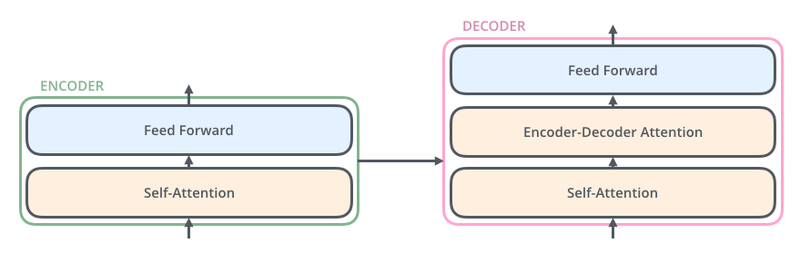<br>
【출처 : [http://jalammar.github.io/illustrated-transformer/](http://jalammar.github.io/illustrated-transformer/)】

첫 번째는 __셀프 어텐션__, 두 번째는 __인코더-디코더 어텐션__, 세 번째는 __피드 포워드 신경망__ 입니다. __인코더-디코더 어텐션__ 은 셀프 어텐션과는 달리, Query가 디코더의 벡터인 반면에 Key와 Value가 인코더의 벡터라는 특징이 있습니다. 이 부분이 인코더가 입력 문장으로부터 정보를 디코더에 전달하는 과정입니다.



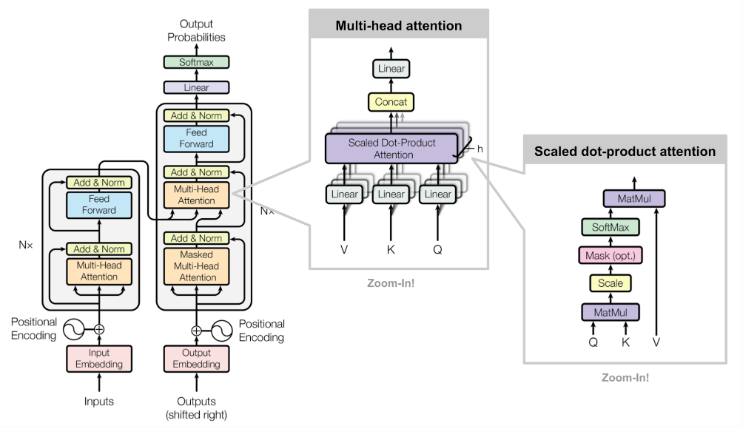<br>
【출처 : [https://medium.com/@shreyasikalra25/predict-movie-reviews-with-bert-88d8b79f5718](https://medium.com/@shreyasikalra25/predict-movie-reviews-with-bert-88d8b79f5718)】

인코더의 __셀프 어텐션__과 마찬가지로 디코더의 __셀프 어텐션__, __인코더-디코더 어텐션__ 두 개의 어텐션 모두 __스케일드 닷 프로덕트 어텐션__ 을 __멀티 헤드 어텐션__ 으로 병렬적으로 수행합니다.



디코더의 세 개의 서브 층을 내부적으로 구현한 디코더의 함수는 다음과 같습니다.



In [13]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


#### 디코더 층을 쌓아 디코더 만들기

<hr>

이렇게 구현한 디코더의 층은 __임베딩 층(Embedding layer)__ 과 __포지셔널 인코딩(Positional Encoding)__ 을 연결하고, 사용자가 원하는 만큼 디코더 층을 쌓아 트랜스포머의 디코더가 완성됩니다.



인코더와 마찬가지로 __num_layers__ 개수의 디코더 층을 쌓습니다. 논문에서는 총 6개의 디코더 층을 사용하였지만, 실습에서는 학습 시간을 고려하여 그보다 적은 개수를 사용할 예정입니다.



In [14]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


이제 인코더 층과 디코더 층을 각각 함수로 구현하였습니다.



이를 하나로 조합하여 트랜스포머 모델을 만들 수 있을 텐데, 우선 그전에 여기서 사용할 챗봇 데이터를 로드하고, 전처리해보겠습니다.




&nbsp;

### 14-10. 챗봇의 병렬 데이터 받아오기


여기서는 __Cornell Movie-Dialogs Corpus__ 라는 영화 및 TV 프로그램에서 사용되었던 대화의 쌍으로 구성된 데이터셋을 사용합니다. 대화의 쌍이라고 하는 것은 기본적으로 먼저 말하는 사람의 대화 문장이 있고, 그에 응답하는 대화 문장의 쌍으로 이루어집니다.



데이터를 받아오는 이번 스텝에서 목표로 하는 것은 다음과 같습니다.



1. 정해진 개수인 50,000개의 질문과 답변의 쌍을 추출한다.


2. 문장에서 단어와 구두점 사이에 공백을 추가한다.


3. 알파벳과 ! ? , . 이 4개의 구두점을 제외하고 다른 특수문자는 모두 제거한다.

데이터를 다운로드해 보겠습니다.



In [15]:
path_to_zip = tf.keras.utils.get_file(
    'cornell_movie_dialogs.zip',
    origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
    extract=True)

path_to_dataset = os.path.join(
    os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')
print("슝=3")

9928704/9916637 [==============================] - 1s 0us/step
슝=3


여기서 우리가 사용할 데이터는 실습 시간을 고려하여 전체 데이터 중 일부입니다. 우선, 데이터 중에서 5만 개만 가져오도록 하고 질문과 답변의 쌍의 형태로 데이터셋을 가공합니다.



In [16]:
# 사용할 샘플의 최대 개수
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


이를 위한 전처리 함수는 다음과 같습니다.



이번 전처리는 __정규 표현식(Regular Expression)__ 을 사용하여 __구두점(punctuation)__ 을 제거하여 단어를 __토크나이징(tokenizing)__ 하는 일에 방해가 되지 않도록 정제하는 것을 목표로 합니다.



In [17]:
# 전처리 함수
def preprocess_sentence(sentence):
  sentence = sentence.lower().strip()

  # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
  # 예를 들어서 "I am a student." => "I am a student ."와 같이
  # student와 온점 사이에 거리를 만듭니다.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")를 제외한 모든 문자를 공백인 ' '로 대체합니다.
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence
print("슝=3")

슝=3


데이터를 로드하는 동시에 전처리 함수를 호출하여 질문과 답변의 쌍을 전처리합니다.



In [18]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
  id2line = {}
  with open(path_to_movie_lines, errors='ignore') as file:
    lines = file.readlines()
  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    id2line[parts[0]] = parts[4]

  inputs, outputs = [], []
  with open(path_to_movie_conversations, 'r') as file:
    lines = file.readlines()

  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

    for i in range(len(conversation) - 1):
      # 전처리 함수를 질문에 해당되는 inputs와 답변에 해당되는 outputs에 적용.
      inputs.append(preprocess_sentence(id2line[conversation[i]]))
      outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

      if len(inputs) >= MAX_SAMPLES:
        return inputs, outputs
  return inputs, outputs
print("슝=3")

슝=3


이렇게 로드한 데이터의 샘플 수를 확인해 볼까요?



In [19]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 50000
전체 샘플 수 : 50000


질문과 답변은 병렬적으로 구성되는 데이터셋이므로 두 샘플 수는 정확하게 일치해야 합니다.



둘 다 5만 개의 샘플이 저장되었습니다.



임의로 22번째 샘플(인덱스 상으로는 21번 샘플)을 출력해서 질문과 답변이 병렬적으로 잘 저장은 되었는지, 그리고 전처리 함수에서 의도했던 전처리가 진행되었는지 확인해 봅시다!



In [20]:
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

전처리 후의 22번째 질문 샘플: she s not a . . .
전처리 후의 22번째 답변 샘플: lesbian ? no . i found a picture of jared leto in one of her drawers , so i m pretty sure she s not harboring same sex tendencies .


?나 .과 같은 구두점들이 단어들과 분리되어 단어와 구두점 사이에는 공백이 추가된 것을 확인할 수 있습니다. 이렇게 함으로써 단어를 토크나이징 하는 과정에서 구두점과 붙어있던 단어들을 하나의 단어로 인식하는 것을 방지할 수 있습니다.




&nbsp;

### 14-11. 병렬 데이터 전처리하기


질문과 답변의 셋을 각각 questions와 answers에 저장하였으므로, 본격적으로 전처리를 진행해보겠습니다. 이번 스텝에서 진행할 전체적인 과정을 요약하면 다음과 같습니다.



1. TensorFlow Datasets __SubwordTextEncoder__ 를 토크나이저로 사용한다.  단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 __정수로 인코딩__ 한다.
2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 `START_TOKEN` 및 `END_TOKEN`을 추가한다.
3. 최대 길이 __MAX_LENGTH__ 인 40을 넘는 문장들은 필터링한다.
4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 __패딩__ 한다.

#### 1. 단어장(Vocabulary) 만들기

<hr>

우선 각 단어에 고유한 정수 인덱스를 부여하기 위해서 단어장(Vocabulary)을 만들어보겠습니다. 단어장을 만들 때는 질문과 답변 데이터셋을 모두 사용하여 만듭니다.



In [21]:
import tensorflow_datasets as tfds
print("살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐
슝=3 


이때 디코더의 문장 생성 과정에서 사용할 '시작 토큰'과 '종료 토큰'에 대해서도 임의로 단어장에 추가하여서 정수를 부여해 줍니다. 이미 생성된 단어장의 번호와 겹치지 않도록 각각 단어장의 크기와 그보다 1이 큰 수를 번호로 부여하면 되겠죠?



In [22]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


시작 토큰과 종료 토큰에 부여된 정수를 출력해봅시다.



In [23]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8331]
END_TOKEN의 번호 : [8332]


각각 8,331과 8,332라는 점에서 현재 단어장의 크기가 8,331(0번부터 8,330번)이라는 의미입니다.



두 개의 토큰을 추가해 주었기 때문에 단어장의 크기도 +2임을 명시해 주어야 합니다.



In [24]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8333


#### 2. 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)

<hr>

위에서 `tensorflow_datasets` 의 `SubwordTextEncoder`를 사용해서 tokenizer를 정의하고 Vocabulary를 만들었다면, `tokenizer.encode()` 로 각 단어를 정수로 변환할 수 있고 또는 `tokenizer.decode()` 를 통해 정수 시퀀스를 단어 시퀀스로 변환할 수 있습니다.



예를 들어서 22번째 샘플을 `tokenizer.encode()` 의 입력으로 사용해서 변환 결과를 봅시다.



In [25]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [60, 8, 37, 8172, 49]
정수 인코딩 후의 21번째 답변 샘플: [7824, 1223, 19, 61, 2, 4, 336, 10, 1595, 14, 1104, 698, 3263, 263, 16, 71, 14, 107, 2133, 900, 3, 59, 4, 23, 355, 204, 60, 8, 37, 885, 2289, 8107, 344, 1001, 5179, 4214, 342, 1]


각 단어에 고유한 정수가 부여된 Vocabulary를 기준으로 단어 시퀀스가 정수 시퀀스로 인코딩된 결과를 확인할 수 있습니다. 위의 결과와 마찬가지로 질문과 답변 셋에 대해서 전부 __정수 인코딩__ 을 수행합니다. 이와 동시에 문장의 최대 길이를 정하고, 해당 길이로 __패딩(padding)__ 합니다.



In [26]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [27]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


정수 인코딩 과정을 수행하면서 샘플의 길이가 40을 넘는 경우는 샘플들을 필터링하였으므로 일부 샘플이 제외되었습니다. 단어장의 크기와 샘플의 개수를 확인해 보겠습니다.



In [28]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8333
필터링 후의 질문 샘플 개수: 44095
필터링 후의 답변 샘플 개수: 44095


#### 3. 교사 강요(Teacher Forcing) 사용하기

<hr>

__tf.data.Dataset API__ 는 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축하는 API입니다.



이를 적극 사용하기 위해서 질문과 답변의 쌍을 `tf.data.Dataset` 의 입력으로 넣어주는 작업을 합니다.



이때, 디코더의 입력과 실제값(레이블)을 정의해 주기 위해서는 __교사 강요(Teacher Forcing)__ 이라는 언어 모델의 훈련 기법을 이해해야만 합니다. 아래의 글을 통해 교사 강요에 대해 알아봅시다. (모두 읽을 필요는 없고, 교사 강요 부분까지만 읽어도 됩니다.)



- [위키독스: RNN 언어 모델](https://wikidocs.net/46496)

~~~
Q4. 교사 강요(Teacher Forcing) 를 사용하지 않았을 경우, 훈련 과정에서 훈련 속도가 지나치게 느려지는 경우가 있다고 합니다. 그 이유는 무엇인가요?


교사 강요를 하지 않은 경우, 잘못된 예측이 다음 시점(time step)의 입력으로 들어가면서 연쇄적으로 예측 정확도에 영향을 미친다.
~~~

이전 자신의 출력이 현재 자신의 상태를 결정하는 모델을 __자기회귀 모델(auto-regressive model, AR)__ 이라고 합니다. 앞서 교사 강요를 이해하기 위해 읽었던 글에 등장한 RNN 언어 모델은 대표적인 자기 회귀 모델의 예이며, 트랜스포머의 디코더 또한 자기회귀 모델입니다.



트랜스포머 디코더에서도 __교사 강요(Teacher Forcing)__ 를 적용합니다.



~~~
Q5. 만약, answers의 한 샘플이 다음과 같았다고 해봅시다.

샘플 : '<START_TOKEN> I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> <PAD>'

<START_TOKEN>은 문장의 시작을 의미하는 시작 토큰, <END_TOKEN>은 문장의 끝을 의미하는 종료 토큰 <PAD>는 패딩을 위해 사용되는 패딩 토큰입니다.

교사 강요를 적용하기 위해서 위 샘플을 디코더의 입력과 레이블로 사용한다고 하였을 때, 각각 어떻게 수정해서 입력과 레이블로 사용해야 할까요?



입력 : <START_TOKEN> I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> 레이블 : I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> <PAD>
~~~

질문과 답변의 쌍을 __tf.data.Dataset API__ 의 입력으로 사용하여 파이프라인을 구성합니다. 이때, 교사 강요를 위해서 `answers[:, :-1]` 를 디코더의 입력값, `answers[:, 1:]` 를 디코더의 레이블로 사용합니다.



In [29]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


&nbsp;

### 14-12. 모델 정의 및 학습하기


이제 앞서 사용한 인코더 층 함수와 디코더 층 함수를 사용하여 트랜스포머 함수를 정의합니다.



In [30]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


#### 1. 모델 생성

<hr>

`num_layers` , `d-Model` , `units` 는 전부 사용자가 정할 수 있는 하이퍼파라미터 값입니다.



논문에서 `num_layers` 는 6 , `d-Model` 은 512 였지만, 빠르고 원활한 훈련을 위해 여기서는 각 하이퍼파라미터를 논문에서보다는 작은 값을 사용합니다.



In [31]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3187456     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

#### 2. 손실 함수(Loss function)

<hr>

레이블인 시퀀스에 패딩이 되어 있으므로, loss를 계산할 때 패딩 마스크를 적용해야 합니다.

In [32]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

print("슝=3")

슝=3


#### 3. 커스텀 된 학습률(Learning rate)

<hr>

딥러닝 모델학습 시 learning rate는 매우 중요한 하이퍼파라미터입니다. 최근에는 모델학습 초기에 learning rate를 급격히 높였다가, 이후 train step이 진행됨에 따라 서서히 낮추어 가면서 안정적으로 수렴하게 하는 고급 기법을 널리 사용하고 있습니다. 이런 방법을 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)이라고 합니다.



논문에 나온 공식을 참고하여 커스텀 학습률 스케줄러를 통한 아담 옵티마이저를 사용합니다. 논문에 나온 공식은 다음과 같습니다.



$$ lrate = d^{-0.5}_{model} \cdot min(step\_num^{-0.5},\ step\_num \cdot warmup\_steps^{-1.5} $$

In [33]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


그러면 방금 정의한 커스텀 학습률 스케줄링 계획을 시각화해 봅시다. 위에 언급한 수식은 $step\_num^{-0.5}$ 에 비례하는 부분과 $step\_num$ 에 비례하는 부분 중 작은 쪽을  택하도록 되어 있습니다. 그래서 학습 초기에는 learning_rate가 $step\_num$ 에 비례해서 증가하다가 이후로는 감소하는 것을 확인할 수 있습니다.


Text(0.5, 0, 'Train Step')

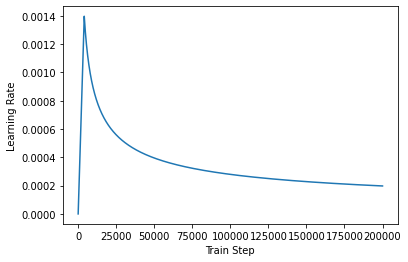

In [34]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

#### 4. 모델 컴파일

<hr>

손실 함수와 커스텀 된 학습률(learning rate)을 사용하여 모델을 컴파일합니다.



In [35]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


#### 5. 훈련하기

<hr>

이제 학습을 진행해 봅시다.



In [36]:
EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10
689/689 [==============================] - 54s 54ms/step - loss: 2.1134 - accuracy: 0.0432
Epoch 2/10
689/689 [==============================] - 38s 55ms/step - loss: 1.4998 - accuracy: 0.0791
Epoch 3/10
689/689 [==============================] - 39s 56ms/step - loss: 1.3948 - accuracy: 0.0860
Epoch 4/10
689/689 [==============================] - 38s 56ms/step - loss: 1.3356 - accuracy: 0.0903
Epoch 5/10
689/689 [==============================] - 49s 71ms/step - loss: 1.2846 - accuracy: 0.0944
Epoch 6/10
689/689 [==============================] - 75s 108ms/step - loss: 1.2374 - accuracy: 0.0979
Epoch 7/10
689/689 [==============================] - 75s 109ms/step - loss: 1.1828 - accuracy: 0.1022
Epoch 8/10
689/689 [==============================] - 75s 109ms/step - loss: 1.1216 - accuracy: 0.1073
Epoch 9/10
689/689 [==============================] - 61s 89ms/step - loss: 1.0642 - accuracy: 0.1130
Epoch 10/10
689/689 [==============================] - 75s 109ms/step - loss: 1

&nbsp;

### 14-13. 챗봇 테스트하기


예측(inference) 단계는 기본적으로 다음과 같은 과정을 거칩니다.



1. 새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리를 거친다.


2. 입력 문장을 토크나이징하고, `START_TOKEN` 과 `END_TOKEN` 을 추가한다.


3. 패딩 마스킹과 룩 어헤드 마스킹을 계산한다.


4. 디코더는 입력 시퀀스로부터 다음 단어를 예측한다.


5. 디코더는 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용한다.


6. `END_TOKEN` 이 예측되거나 문장의 최대 길이에 도달하면 디코더는 동작을 멈춘다.

위의 과정을 모두 담은 `decoder_inference()` 함수를 만듭니다.



In [37]:
def decoder_inference(sentence):

    ## 전처리：훈련때와 동일
    sentence = preprocess_sentence(sentence)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)

슝=3


임의의 입력 문장에 대해서 `decoder_inference()` 함수를 호출하여 챗봇의 대답을 얻는 `sentence_generation()` 함수를 만듭니다.



In [38]:
def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence

슝=3


임의의 문장으로부터 챗봇의 대답을 얻어봅시다.



In [39]:
sentence_generation('Where have you been?')

입력 : Where have you been?
출력 : i don t know . i don t know . i just don t want to be alone .


'i don t know . i don t know . i just don t want to be alone .'

In [40]:
sentence_generation("It's a trap")

입력 : It's a trap
출력 : i don t want to be alone .


'i don t want to be alone .'

&nbsp;

### 14-14. 프로젝트: 한국어 데이터로 챗봇 만들기


영어로 만들었던 챗봇을 한국어 데이터로 바꿔서 훈련시켜봅시다.



시작하기 전에 우선 주요 라이브러리 버전을 확인해 봅시다.



In [43]:
import tensorflow

print(tensorflow.__version__)

2.6.0


&nbsp;

#### Step 1. 데이터 수집하기

<hr>


한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용합니다.

이 데이터는 아래의 링크에서 다운로드할 수 있습니다.

- [songys/Chatbot_data](https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv)

&nbsp;

#### Step 2. 데이터 전처리하기

<hr>

영어 데이터와는 전혀 다른 데이터인 만큼 영어 데이터에 사용했던 전처리와 일부 동일한 전처리도 필요하겠지만 전체적으로는 다른 전처리를 수행해야 할 수도 있습니다.



&nbsp;

#### Step 3. SubwordTextEncoder 사용하기

<hr>

한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다고 많은 분이 알고 있습니다. 하지만 여기서는 형태소 분석기가 아닌 위 실습에서 사용했던 내부 단어 토크나이저인 `SubwordTextEncoder` 를 그대로 사용해보세요.



&nbsp;

#### Step 4. 모델 구성하기

<hr>

위 실습 내용을 참고하여 트랜스포머 모델을 구현합니다.



&nbsp;

#### Step 5. 모델 평가하기

<hr>

Step 1에서 선택한 전처리 방법을 고려하여 입력된 문장에 대해서 대답을 얻는 예측 함수를 만듭니다.




&nbsp;

&nbsp;

<hr>

# Exploration Project 14

### Interactive chatbot

<hr>

### ▶ seq2seq 모델의 한계

 - 인코더는 입력 시퀀스를 하나의 벡터 표현으로 압축하고, 디코더는 이 벡터 표현을 통해서 출력 시퀀스를 만들어냄.
 
 - 인코더가 입력 시퀀스를 하나의 벡터로 압축하는 과정에서 입력 시퀀스의 정보가 일부 손실 → 이를 보정하기 위해 어텐션 사용.
 
  〓》 어텐션을 RNN의 보정을 위한 용도로서 사용하는 것이 아니라, 어텐션만으로 인코더와 디코더를 만들어보면?

### ▶ 트랜스포머 개요

- 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델

- 기존의 seq2seq의 구조인 인코더-디코더를 따르면서도, 어텐션(Attention)만으로 구현한 모델

- RNN을 사용하지 않고, 인코더-디코더 구조를 설계하였음에도 번역 성능에서 RNN보다 우수한 성능

- 다른 task에도 잘 일반화된다.

### ▶ 트랜스포머(Transformer)의 주요 하이퍼파라미터


 - 사용자가 모델 설계시 임의로 변경할 수 있는 값들. (정의하는 수치는 트랜스포머를 제안한 논문에서 사용한 수치)
 
 
 - $d_{model}$ = 512
   + 트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기.
   + 임베딩 벡터의 차원 또한 $d_{model}$.
   + 각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼 때에도 이 차원을 유지.


 - $num\_layers$ = 6
   + 트랜스포머에서 하나의 인코더와 디코더를 층으로 생각하였을 때, <br>
   트랜스포머 모델에서 인코더와 디코더가 총 몇 층으로 구성되었는지를 의미
   
   
 - $num\_heads$ = 8
   + 트랜스포머는 어텐션을 여러 개로 분할해서 병렬로 어텐션을 수행하고<br>
   결과값을 다시 하나로 합치는 방식을 사용.
   + 병렬의 개수를 의미
   

 - $d_{ff}$(여기선 UNIT) = 2048
   + 트랜스포머 내부에 피드 포워드 신경망이 존재.
   + 해당 신경망의 은닉층의 크기를 의미
   + 피드 포워드 신경망의 입력층과 출력층의 크기는 $d_{model}$.

## ▶ Attention is all you need : 본 프로젝트의 시작이자 끝

 - [Attention Is All You Need](https://arxiv.org/pdf/1706.03762) ：대부분의 내용은 이 논문을 기반으로 한다.
 
 
 - [attention is all you need 한글 번역](https://sulung-sulung.tistory.com/8) ：한글 번역본
 
 
 - [Transformers Explained Visually (Part 3): Multi-head Attention, deep dive](https://towardsdatascience.com/transformers-explained-visually-part-3-multi-head-attention-deep-dive-1c1ff1024853) ：트랜스포머를 시각화 하여 설명. (영문)
 
 
 본 프로젝트 또한, 대부분의 내용을 Attention is all you need 논문에 기반한 구현을 따르는 여러 자료를 참고하여,
 
 노드의 실습 내용을 이해함과 동시에 구현을 충실히 수행하여 최종적으로 결과를 확인 하는, 전반적인 과정에 포커스를 두었다.
 


&nbsp;

## 1. 라이브러리와 데이터 준비

필요한 라이브러리를 준비한다.

In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
## 해당 import 는 Exploration Node.08 영화리뷰 텍스트 감성분석하기 에서의 내용을 다시 사용한다. 
import konlpy
import gensim
from konlpy.tag import Mecab
from collections import Counter
from gensim.models.keyedvectors import Word2VecKeyedVectors
from gensim.models import KeyedVectors
from tensorflow.keras.initializers import Constant

print(konlpy.__version__)
print(gensim.__version__)

0.5.2
4.1.2


바로 데이터를 준비하도록 하자.

한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용한다.

데이터는 아래의 링크에서 다운로드 하였다.

- [songys/Chatbot_data](https://github.com/songys/Chatbot_data/blob/master/ChatbotData.csv)

링크에서 안내하고 있는 내용은 아래와 같다. 

──────────────────────────────────────

- Chatbot_data_for_Korean v1.0
    
  + Data description.
  
    * 인공데이터입니다. 일부 이별과 관련된 질문에서 <br>다음카페 "사랑보다 아름다운 실연( http://cafe116.daum.net/_c21_/home?grpid=1bld )"에서 <br>자주 나오는 이야기들을 참고하여 제작하였습니다. <br>가령 "이별한 지 열흘(또는 100일) 되었어요"라는 질문에 <br>챗봇이 위로한다는 취지로 답변을 작성하였습니다.
    
    * 1. 챗봇 트레이닝용 문답 페어 11,876개
    
    * 2. 일상다반사 0, 이별(부정) 1, 사랑(긍정) 2로 레이블링
    
    * 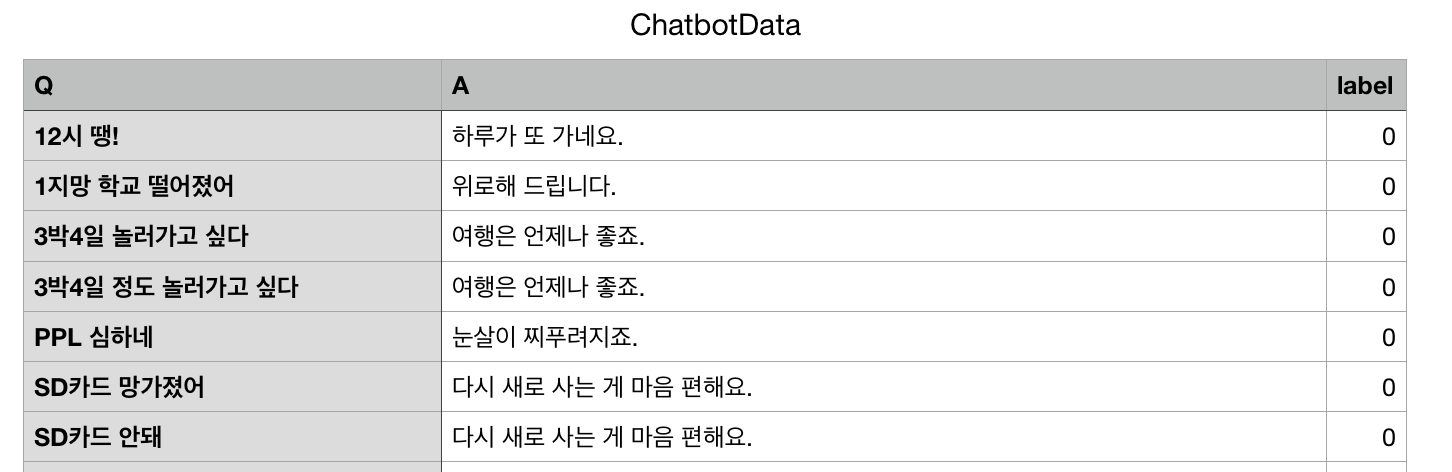

──────────────────────────────────────

In [3]:
## 경로 설정
songys_chabot_data_path =  os.getenv("HOME")+"/aiffel/transformer_chatbot/data/ChatbotData .csv"
df_songys_chabot = pd.read_csv(songys_chabot_data_path)

In [4]:
df_songys_chabot.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [5]:
df_songys_chabot.tail()

,Q,A,label
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2
11822,힘들어서 결혼할까봐,도피성 결혼은 하지 않길 바라요.,2


In [6]:
df_songys_chabot.shape

(11823, 3)

라벨의 경우 일상다반사 0, 이별(부정) 1 , 사랑(긍정) 2 로 라벨링이 되어 있다고 한다.

집계함수를 이용하여, 라벨별 분포가 어떤지 알아보자.

In [7]:
df_songys_chabot.groupby("label")['Q'].count()

label
0    5290
1    3570
2    2963
Name: Q, dtype: int64

일상다반사 라벨이 제일 많은 비중을 차지하고 있다.

라벨은 사용하지 않을 것이지만, 라벨순서로 정렬이 되어있는 데이터라 우선 Suffle 해주도록 하겠다.

In [8]:
# row 전체 shuffle
# df_songys_chabot = df_songys_chabot.sample(frac=1)  

# shuffling하고 index reset
df_songys_chabot = df_songys_chabot.sample(frac=1).reset_index(drop=True) 

In [9]:
df_songys_chabot.head()

,Q,A,label
0,팔베개하고 자다가 팔 저린데 말해야겠지?,손잡고 주무세요.,2
1,짝녀한테도 철벽쳐요. 성격이 왜 그럴까요.,두려운게 있는게 아닐까요.,2
2,축구 잘해,운동 잘하는 사람 멋있죠.,0
3,입을 거 없다,옷은 사도 사도 모자라요.,0
4,끝.,또 다른 시작.,1


In [10]:
df_songys_chabot.tail()

,Q,A,label
11818,회복되는게 하루하루가 다른거 같아!!,회복력이 좋으시군요.,1
11819,어떻게 하면 좋을까.,고민이 되시겠어요.,1
11820,언제쯤 예쁘게 화장 잘할까,하다보면 늘어요.,0
11821,중고 거래 했어,알뜰한 소비 하셨네요.,0
11822,나만 이상한 사람이래,그 말을 한 사람이 가장 이상할 거예요.,0


데이터가 섞인것을 확인 할 수 있다.

중복 및 결측치 확인을 해보자.

In [11]:
## 중복값 확인 - Train

print("df_songys_chabot 전체 :", df_songys_chabot.shape)
print("df_songys_chabot【Q】중복 :", df_songys_chabot[df_songys_chabot["Q"].duplicated()].shape)
print("df_songys_chabot【A】중복 :", df_songys_chabot[df_songys_chabot["A"].duplicated()].shape)
print("f_songys_chabot【Q】중복제거후 예상 :", df_songys_chabot[~df_songys_chabot["Q"].duplicated()].shape)
print("f_songys_chabot【A】중복제거후 예상 :", df_songys_chabot[~df_songys_chabot["A"].duplicated()].shape)

df_songys_chabot 전체 : (11823, 3)
df_songys_chabot【Q】중복 : (161, 3)
df_songys_chabot【A】중복 : (4044, 3)
f_songys_chabot【Q】중복제거후 예상 : (11662, 3)
f_songys_chabot【A】중복제거후 예상 : (7779, 3)


A 컬럼의 경우 중복을 제거하면 값이 많이 사라진다.

챗봇의 응답이 비슷하다고 하여도, 크게 문제 될 것이 없다 생각하여

중복을 제거하지 않고 진행하겠다.

다음은 결측치를 확인 해 보겠다.

In [12]:
print("df_songys_chabot 전체 :", df_songys_chabot.shape)
print("df_songys_chabot【Q】결측 :", df_songys_chabot[df_songys_chabot["Q"].isnull()].shape)
print("df_songys_chabot【A】결측 :", df_songys_chabot[df_songys_chabot["A"].isnull()].shape)
print("df_songys_chabot【Q】결측제거후 예상 :", df_songys_chabot[~df_songys_chabot["Q"].isnull()].shape)
print("df_songys_chabot【A】결측제거후 예상 :", df_songys_chabot[~df_songys_chabot["A"].isnull()].shape)

df_songys_chabot 전체 : (11823, 3)
df_songys_chabot【Q】결측 : (0, 3)
df_songys_chabot【A】결측 : (0, 3)
df_songys_chabot【Q】결측제거후 예상 : (11823, 3)
df_songys_chabot【A】결측제거후 예상 : (11823, 3)


결측값은 하나도 없다.

데이터에서 유의미한 단어 토큰만을 선별하기 위해서는, 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요하다.

여기서 큰 의미가 없다라는 것은, 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말한다.

이러한 도움이 안되는 것들을, 불용어 라고 한다.

불용어는 [딥 러닝을 이용한 자연어 처리 입문 - 04) 불용어(Stopword)](https://wikidocs.net/22530) 내용에서

[보편적으로 선택할 수 있는 한국어 불용어 리스트](https://www.ranks.nl/stopwords/korean) 를 소개하고 있는데,

이 자료를 참고하여, 한국어 불용어 리스트를 직접 정리하여 아래에 정의하였다.

In [13]:
stopwords = ["아", "휴", "아이구", "아이쿠", "아이고", "어", "나", "우리", "저희", "따라", "의해", "을", "를", "에", "의", "가", "으로", "로", "에게", "뿐이다", "의거하여", "근거하여", "입각하여", "기준으로", "예하면", "예를 들면", "예를 들자면", "저", "소인", "소생", "저희", "지말고", "하지마", "하지마라", "다른", "물론", "또한", "그리고", "비길수 없다", "해서는 안된다", "뿐만 아니라", "만이 아니다", "만은 아니다", "막론하고", "관계없이", "그치지 않다", "그러나", "그런데", "하지만", "든간에", "논하지 않다", "따지지 않다", "설사", "비록", "더라도", "아니면", "만 못하다", "하는 편이 낫다", "불문하고", "향하여", "향해서", "향하다", "쪽으로", "틈타", "이용하여", "타다", "오르다", "제외하고", "이 외에", "이 밖에", "하여야", "비로소", "한다면 몰라도", "외에도", "이곳", "여기", "부터", "기점으로", "따라서", "할 생각이다", "하려고하다", "이리하여", "그리하여", "그렇게 함으로써", "하지만", "일때", "할때", "앞에서", "중에서", "보는데서", "으로써", "로써", "까지", "해야한다", "일것이다", "반드시", "할줄알다", "할수있다", "할수있어", "임에 틀림없다", "한다면", "등", "등등", "제", "겨우", "단지", "다만", "할뿐", "딩동", "댕그", "대해서", "대하여", "대하면", "훨씬", "얼마나", "얼마만큼", "얼마큼", "남짓", "여", "얼마간", "약간", "다소", "좀", "조금", "다수", "몇", "얼마", "지만", "하물며", "또한", "그러나", "그렇지만", "하지만", "이외에도", "대해 말하자면", "뿐이다", "다음에", "반대로", "반대로 말하자면", "이와 반대로", "바꾸어서 말하면", "바꾸어서 한다면", "만약", "그렇지않으면", "까악", "툭", "딱", "삐걱거리다", "보드득", "비걱거리다", "꽈당", "응당", "해야한다", "에 가서", "각", "각각", "여러분", "각종", "각자", "제각기", "하도록하다", "와", "과", "그러므로", "그래서", "고로", "한 까닭에", "하기 때문에", "거니와", "이지만", "대하여", "관하여", "관한", "과연", "실로", "아니나다를가", "생각한대로", "진짜로", "한적이있다", "하곤하였다", "하", "하하", "허허", "아하", "거바", "와", "오", "왜", "어째서", "무엇때문에", "어찌", "하겠는가", "무슨", "어디", "어느곳", "더군다나", "하물며", "더욱이는", "어느때", "언제", "야", "이봐", "어이", "여보시오", "흐흐", "흥", "휴", "헉헉", "헐떡헐떡", "영차", "여차", "어기여차", "끙끙", "아야", "앗", "아야", "콸콸", "졸졸", "좍좍", "뚝뚝", "주룩주룩", "솨", "우르르", "그래도", "또", "그리고", "바꾸어말하면", "바꾸어말하자면", "혹은", "혹시", "답다", "및", "그에 따르는", "때가 되어", "즉", "지든지", "설령", "가령", "하더라도", "할지라도", "일지라도", "지든지", "몇", "거의", "하마터면", "인젠", "이젠", "된바에야", "된이상", "만큼	어찌됏든", "그위에", "게다가", "점에서 보아", "비추어 보아", "고려하면", "하게될것이다", "일것이다", "비교적", "좀", "보다더", "비하면", "시키다", "하게하다", "할만하다", "의해서", "연이서", "이어서", "잇따라", "뒤따라", "뒤이어", "결국", "의지하여", "기대여", "통하여", "자마자", "더욱더", "불구하고", "얼마든지", "마음대로", "주저하지 않고", "곧", "즉시", "바로", "당장", "하자마자", "밖에 안된다", "하면된다", "그래", "그렇지", "요컨대", "다시 말하자면", "바꿔 말하면", "즉", "구체적으로", "말하자면", "시작하여", "시초에", "이상", "허", "헉", "허걱", "바와같이", "해도좋다", "해도된다", "게다가", "더구나", "하물며", "와르르", "팍", "퍽", "펄렁", "동안", "이래", "하고있었다", "이었다", "에서", "로부터", "까지", "예하면", "했어요", "해요", "함께", "같이", "더불어", "마저", "마저도", "양자", "모두", "습니다", "가까스로", "하려고하다", "즈음하여", "다른", "다른 방면으로", "해봐요", "습니까", "했어요", "말할것도 없고", "무릎쓰고", "개의치않고", "하는것만 못하다", "하는것이 낫다", "매", "매번", "들", "모", "어느것", "어느", "로써", "갖고말하자면", "어디", "어느쪽", "어느것", "어느해", "어느 년도", "라 해도", "언젠가", "어떤것", "어느것", "저기", "저쪽", "저것", "그때", "그럼", "그러면", "요만한걸", "그래", "그때", "저것만큼", "그저", "이르기까지", "할 줄 안다", "할 힘이 있다", "너", "너희", "당신", "어찌", "설마", "차라리", "할지언정", "할지라도", "할망정", "할지언정", "구토하다", "게우다", "토하다", "메쓰겁다", "옆사람", "퉤", "쳇", "의거하여", "근거하여", "의해", "따라", "힘입어", "그", "다음", "버금", "두번째로", "기타", "첫번째로", "나머지는", "그중에서", "견지에서", "형식으로 쓰여", "입장에서", "위해서", "단지", "의해되다", "하도록시키다", "뿐만아니라", "반대로", "전후", "전자", "앞의것", "잠시", "잠깐", "하면서", "그렇지만", "다음에", "그러한즉", "그런즉", "남들", "아무거나", "어찌하든지", "같다", "비슷하다", "예컨대", "이럴정도로", "어떻게", "만약", "만일", "위에서 서술한바와같이", "인 듯하다", "하지 않는다면", "만약에", "무엇", "무슨", "어느", "어떤", "아래윗", "조차", "한데", "그럼에도 불구하고", "여전히", "심지어", "까지도", "조차도", "하지 않도록", "않기 위하여", "때", "시각", "무렵", "시간", "동안", "어때", "어떠한", "하여금", "네", "예", "우선", "누구", "누가 알겠는가", "아무도", "줄은모른다", "줄은 몰랏다", "하는 김에", "겸사겸사", "하는바", "그런 까닭에", "한 이유는", "그러니", "그러니까", "때문에", "그", "너희", "그들", "너희들", "타인", "것", "것들", "너", "위하여", "공동으로", "동시에", "하기 위하여", "어찌하여", "무엇때문에", "붕붕", "윙윙", "나", "우리", "엉엉", "휘익", "윙윙", "오호", "아하", "어쨋든", "만 못하다	하기보다는", "차라리", "하는 편이 낫다", "흐흐", "놀라다", "상대적으로 말하자면", "마치", "아니라면", "쉿", "그렇지 않으면", "그렇지 않다면", "안 그러면", "아니었다면", "하든지", "아니면", "이라면", "좋아", "알았어", "하는것도", "그만이다", "어쩔수 없다", "하나", "일", "일반적으로", "일단", "한켠으로는", "오자마자", "이렇게되면", "이와같다면", "전부", "한마디", "한항목", "근거로", "하기에", "아울러", "하지 않도록", "않기 위해서", "이르기까지", "이 되다", "로 인하여", "까닭으로", "이유만으로", "이로 인하여", "그래서", "이 때문에", "그러므로", "그런 까닭에", "알 수 있다", "결론을 낼 수 있다", "으로 인하여", "있다", "어떤것", "관계가 있다", "관련이 있다", "연관되다", "어떤것들", "에 대해", "이리하여", "그리하여", "여부", "하기보다는", "하느니", "하면 할수록", "운운", "이러이러하다", "하구나", "하도다", "다시말하면", "다음으로", "에 있다", "에 달려 있다", "우리", "우리들", "오히려", "하기는한데", "어떻게", "어떻해", "어찌됏어", "어때", "어째서", "본대로", "자", "이", "이쪽", "여기", "이것", "이번", "이렇게말하자면", "이런", "이러한", "이와 같은", "요만큼", "요만한 것", "얼마 안 되는 것", "이만큼", "이 정도의", "이렇게 많은 것", "이와 같다", "이때", "이렇구나", "것과 같이", "끼익", "삐걱", "따위", "와 같은 사람들", "부류의 사람들", "왜냐하면", "중의하나", "오직", "오로지", "에 한하다", "하기만 하면", "도착하다", "까지 미치다", "도달하다", "정도에 이르다", "할 지경이다", "결과에 이르다", "관해서는", "여러분", "하고 있다", "한 후", "혼자", "자기", "자기집", "자신", "우에 종합한것과같이", "총적으로 보면", "총적으로 말하면", "총적으로", "대로 하다", "으로서", "참", "그만이다", "할 따름이다", "쿵", "탕탕", "쾅쾅", "둥둥", "봐", "봐라", "아이야", "아니", "와아", "응", "아이", "참나", "년", "월", "일", "령", "영", "일", "이", "삼", "사", "오", "육", "륙", "칠", "팔", "구", "이천육", "이천칠", "이천팔", "이천구", "하나", "둘", "셋", "넷", "다섯", "여섯", "일곱", "여덟", "아홉", "령", "영"]

그리고 토크나이징(Tokenizing) 에 방해를 받지 않도록

한글 글자 외의 구두점, 특수문자 등의 자료들을 제거하는 정도로 데이터 정제를 할 것이다.

hangul_preproc 함수는 

In [14]:
def hangul_preproc(content):
    content = content.strip()    ## strip() : 인자는 제거할 문자 지정. 지정 하지 않은 기본값은 문자열의 선행 후행 공백 제거
    content = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣?.!,\s]", "", content)    ## 한글과 공백, 구두점을 제외하고 모두 제거
    content = content.strip()
    content = re.sub(r"([?.!,])", r" \1 ", content)
    content = content.strip()
    content = re.sub(r"  ", " ", content)    ## 2칸 공백 조정
    content = content.strip()
    content = re.sub(r"^ +", "", content)    ## 1칸 초과하는 공백 제거 (첫번째 공백은 유지, 이어서 두번째 부터 공백 나타나면 제거)
    content = content.strip()
    content = re.sub(r"^ +", "", content)    ## 1칸 초과하는 공백 제거 (첫번째 공백은 유지, 이어서 두번째 부터 공백 나타나면 제거)
    content = content.strip()
    return content

In [15]:
##### 테스트 ──────────────────────────────────────────────────────

print(hangul_preproc("너의 공격 패턴을 알아냈다, 그것은 강약약 강약약약 강중약이다!"))
print(hangul_preproc("반경 400m 이내의 모든 생물이 죽어. 빅장의 위력 뼛속까지 느껴라"))
print(hangul_preproc("'53살' 최성국, ♥24살 연하 신부와 11월 5일 백년가약 [공식입장]"))
print(hangul_preproc("간판 내리고 문 잠가 shut down"))
print()
print(df_songys_chabot["Q"][1])
print(df_songys_chabot["A"][1])
print()
print(df_songys_chabot["Q"][543])
print(df_songys_chabot["A"][543])
print()
print(df_songys_chabot["Q"][9876])
print(df_songys_chabot["A"][9876])

##### 테스트 ──────────────────────────────────────────────────────

너의 공격 패턴을 알아냈다 , 그것은 강약약 강약약약 강중약이다 !
반경 이내의 모든 생물이 죽어 . 빅장의 위력 뼛속까지 느껴라
살 최성국 , 살 연하 신부와 월 일 백년가약 공식입장
간판 내리고 문 잠가

짝녀한테도 철벽쳐요. 성격이 왜 그럴까요.
두려운게 있는게 아닐까요.

기프트콘으로 선물 해야겠다
직접 주는 게 더 좋을 것 같아요.

낮에는 그나마 괜찮은데
밤에는 힘든가요.


데이터를 로드하는 동시에 전처리 함수를 호출하여 질문과 답변의 쌍을 전처리하여 만드는 함수를 정의하겠다.

In [16]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations():
    q, a = [], []
   
    q.clear()
    a.clear()
    
    for i in range(len(df_songys_chabot)):
        q.append(hangul_preproc(df_songys_chabot["Q"][i]))
        a.append(hangul_preproc(df_songys_chabot["A"][i]))
                 
    return q, a

데이터를 로드하고, 로드 한 데이터의 샘플 수를 확인해 보자.

In [17]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

전체 샘플 수 : 11823
전체 샘플 수 : 11823


질문과 답변은 병렬적으로 구성되는 데이터셋이므로 두 샘플 수는 정확하게 일치해야 한다.

둘 다 같은 수의 샘플을 확인 할 수 있다.

임의의 샘플을 출력해서 질문과 답변이 병렬적으로 잘 저장은 되었는지,

그리고 전처리 함수에서 의도했던 전처리가 진행되었는지 확인해 보자.

In [18]:
for rand_idx in np.random.randint(len(questions), size=5):
    print("전처리 후의", rand_idx, "번째 질문 샘플 : {}".format(questions[rand_idx]))
    print("전처리 후의", rand_idx, "번째 답변 샘플 : {}".format(answers[rand_idx]))
    print("─" *64)

전처리 후의 9873 번째 질문 샘플 : 딱 년 연애
전처리 후의 9873 번째 답변 샘플 : 달달할 시기네요 .
────────────────────────────────────────────────────────────────
전처리 후의 7517 번째 질문 샘플 : 집안일을 못하겠어
전처리 후의 7517 번째 답변 샘플 : 조금씩 잘 하게 될거예요
────────────────────────────────────────────────────────────────
전처리 후의 4124 번째 질문 샘플 : 시원섭섭하지만 후련하네 .
전처리 후의 4124 번째 답변 샘플 : 한결 나아졌길 바랄게요 .
────────────────────────────────────────────────────────────────
전처리 후의 6223 번째 질문 샘플 : 썸 어떻게 타 ?
전처리 후의 6223 번째 답변 샘플 : 일단 연락처를 주고 받고 부담스럽지 않는 선에서 친해지는게 좋아요 .
────────────────────────────────────────────────────────────────
전처리 후의 6587 번째 질문 샘플 : 결혼적령기가 언제야 ?
전처리 후의 6587 번째 답변 샘플 : 내가 결혼할 때가 결혼적령기예요 .
────────────────────────────────────────────────────────────────


&nbsp;

## 2. 병렬 데이터 전처리하기

질문과 답변의 셋을 각각 questions와 answers에 저장하였으므로, 본격적으로 전처리를 진행해보자.

이번 스텝에서 진행할 전체적인 과정을 요약하면 다음과 같습니다.

1. TensorFlow Datasets __SubwordTextEncoder__ 를 토크나이저로 사용한다.<br>단어보다 더 작은 단위인 Subword를 기준으로 토크나이징하고,  각 토큰을 고유한 __정수로 인코딩__ 한다.
2. 각 문장을 토큰화하고 각 문장의 시작과 끝을 나타내는 `START_TOKEN` 및 `END_TOKEN`을 추가한다.
3. 최대 길이 __MAX_LENGTH__ 인 40을 넘는 문장들은 필터링한다.
4. MAX_LENGTH보다 길이가 짧은 문장들은 40에 맞도록 __패딩__ 한다.

### 2-1. 단어장(Vocabulary) 만들기

<hr>

▶ SubwordTextEncoder：텐서플로우를 통해 사용할 수 있는 서브워드 토크나이저

 - [tfds.deprecated.text.SubwordTextEncoder](https://www.tensorflow.org/datasets/api_docs/python/tfds/deprecated/text/SubwordTextEncoder)

8192


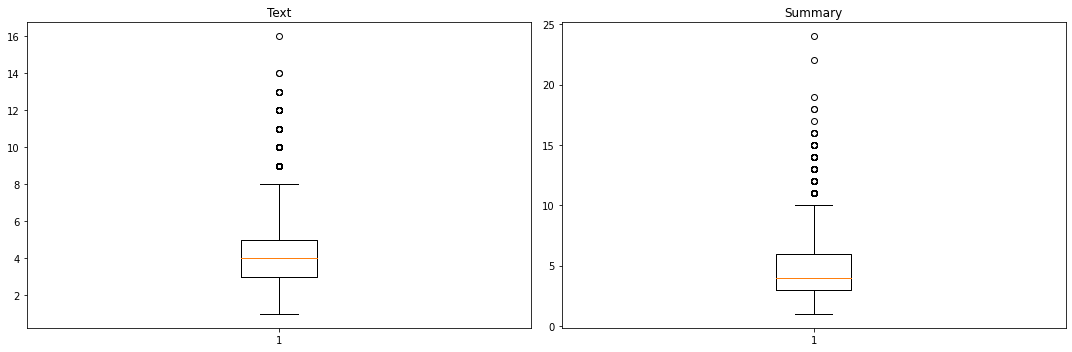

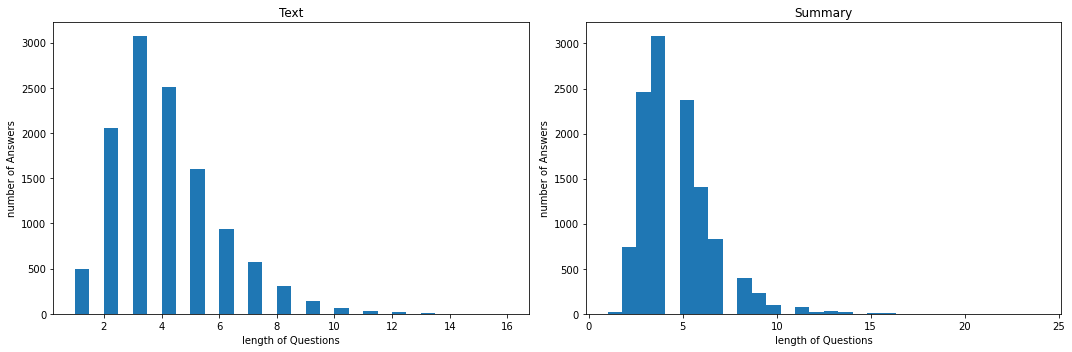

물음 최소 길이 : 1
물음 최대 길이 : 16
물음 평균 길이 : 3.939186331726296
답변 최소 길이 : 1
답변 최대 길이 : 24
답변 평균 길이 : 4.715046942400406


In [19]:
## 테스트 ────────────────────────────────────────────────
print(2**13)


# 길이 분포 출력
q_len = [len(s.split()) for s in questions]
a_len = [len(s.split()) for s in answers]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(q_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(a_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Text')
plt.hist(q_len, bins = 30)
plt.xlabel('length of Questions')
plt.ylabel('number of Answers')
plt.subplot(1,2,2)
plt.title('Summary')
plt.hist(a_len, bins = 30)
plt.xlabel('length of Questions')
plt.ylabel('number of Answers')
plt.tight_layout()
plt.show()

print('물음 최소 길이 : {}'.format(np.min(q_len)))
print('물음 최대 길이 : {}'.format(np.max(q_len)))
print('물음 평균 길이 : {}'.format(np.mean(q_len)))
print('답변 최소 길이 : {}'.format(np.min(a_len)))
print('답변 최대 길이 : {}'.format(np.max(a_len)))
print('답변 평균 길이 : {}'.format(np.mean(a_len)))



## 테스트 ────────────────────────────────────────────────

토큰화 하기 전에, 예상 분포를 한번 확인해 보았다.

In [20]:
## 테스트 ────────────────────────────────────────────────

max_q_idx = q_len.index(np.max(q_len))
max_a_idx = a_len.index(np.max(a_len))
min_q_idx = q_len.index(np.min(q_len))
min_a_idx = a_len.index(np.min(a_len))

print(max_q_idx)    ## 물음 최대길이 index
print(max_a_idx)    ## 정답 최대길이 index
print(min_q_idx)    ## 물음 최소길이 index
print(min_a_idx)    ## 정답 최소길이 Index

## 테스트 ────────────────────────────────────────────────

7088
766
19
110


제일 긴 문장, 제일 짧은 문장들의 내용을 확인 만 해 보자

In [21]:
## 테스트 ────────────────────────────────────────────────

print(questions[max_q_idx])   ## 최대길이 Question 내용
print(answers[max_a_idx])     ## 최대길이 Answer 내용
print(questions[min_q_idx])   ## 최소길이 Question 내용
print(answers[min_a_idx])     ## 최소길이 Answer 내용

## 테스트 ────────────────────────────────────────────────

확실히 좋아하는 데도 관심 있는거 티 안내려고 선톡 안하고 일부러 늦게 보내고 그러는 사람도 있어요 ?
썸 탈 때는 특히 속상한 것 같아요 . 내 맘 같지 않고 아직 내 사람이 아니니까요 . 그래도 그 순간을 즐겨보는 건 어떨까요 ?
의외야
꼬르륵


생각해보니, 불용어 기껏 고생해서 만들어 둔 것 사용할 필요가 없는 것 같다... 약간 힘이 빠진다.

물음 또는 답변에 대한 평균 길이를 보면 5 단어가 안된다.

따라서 너무 긴 것들은 삭제를 해도 괜찮을 것 같다. 내용 확인하고 삭제를 하도록 하겠다.

좀 전에 사용했던 함수를 다시 조금 변형하도록 하겠다.

load_conversations 함수를 재정의 한다.

한번 쓰고 말 거라서 대충 만들었다, 파라메터는 둘 다 입력하여야 한다.

파라메터 하나라도 사용하지 않을경우에는, 기본 처리로 진행된다.

In [22]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
def load_conversations(q_maxlen=0, a_maxlen=0):
    quest, ans = [], []
   
    quest.clear()
    ans.clear()

    print(q_maxlen, a_maxlen)

    for i in range(len(df_songys_chabot)):
#     for i in range(30):
        
        q = hangul_preproc(df_songys_chabot["Q"][i])
        a = hangul_preproc(df_songys_chabot["A"][i])
        
        q_len = len(q.split())
        a_len = len(a.split())
        
        ## q_maxlen, a_maxlen 설정 했을때
        if q_maxlen > 0 and a_maxlen > 0:
            if q_len <= q_maxlen and a_len <= a_maxlen:
                quest.append(q)
                ans.append(a)
            else:
                print(q, "→", q_len)
                print(a, "→", a_len)
                continue
        elif q_maxlen == 0 and a_maxlen == 0:
            quest.append(q)
            ans.append(a)
         
    return quest, ans

In [23]:
## 단어수는 물음의 경우 10개, 응답의 경우 15개 단어수로 제한하고자 한다.
questions, answers = load_conversations(q_maxlen=10, a_maxlen=15)
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

10 15
내 친구랑 내 짝녀가 서로 좋아하는 것 같은데 나 어떡함 ? → 11
천천히 마음을 정리하는게 필요하겠어요 . → 5
썸 탈 때 연락문제로 속상한 적 있어 ? → 8
썸 탈 때는 특히 속상한 것 같아요 . 내 맘 같지 않고 아직 내 사람이 아니니까요 . 그래도 그 순간을 즐겨보는 건 어떨까요 ? → 24
나한테 배려해줘서 나도 해주고 싶어 → 5
보는 만큼 알게 되고 아는 만큼 좋아할 수 있고 좋아하는 만큼 배려해줄 수 있을 거예요 . → 16
오늘 만나기로 했는데 빈손으로 나가 ? → 6
준비하지 않아도 상관 없다고 생각해요 . 필요하다면 화려하지 않고 부담 없는 선물을 준비하면 센스있는 사람으로 생각할 거예요 . → 18
내 친구들이 다 별로라고 하는 짝녀 나만 좋다면 연락하는게 맞는걸까 ? → 11
다른 사람들이 별로라고 말하는 이유를 생각해보세요 . → 7
내가 좋아하는 애가 날 좋아하는 것 같으면 갑자기 정 떨어지고 뭔가 싫어짐 → 12
어떤 심리일까요 . → 3
제가 좋아하는 남자가 저를 짝사랑한대요 . 제가 먼저 고백해도 될까요 ? → 11
행복한 고민이네요 . 당장 만나 고백하세요 . → 7
연애를 실패할 수록 두려워 . 좋은 사람 만날 수 있을까 ? → 11
더 좋은 사람 만날 거예요 . → 6
내가 좋아하는 남자를 만나는게 나아 ? 나를 좋아하는 남자를 만나는게 나아 ? → 12
그건 본인의 사랑 방식에 따라 다릅니다 . → 7
짝남한테 주말에 만나자고 했는데 일 있대 계속 언제 되는지 물어봐도 되나 . → 12
거절 하는게 느껴지면 그만하는게 좋겠어요 . → 6
년을 널 위해 모든걸 바쳤고 니가 떠난후 년동안 난 미친듯이 살았다 . → 12
힘든 시간 잘 버텨냈어요 . → 5
나는 아직 고백 전인데 소문 나서 짝녀가 알게 됐는데 어떻게 함 ? → 12
그 사실에 사과하고 늦지 않게 고백하는게 좋을 것 같아요 . → 10
오래 못 가는 연애 → 4
연애는 문제가 있으면 문제를 해결 하기 위해 함께 노력하고 그 속에서 더욱 단단해지는

이전에 비해서 샘플 갯수가 약간 줄어들었다.

In [24]:
## 테스트 ────────────────────────────────────────────────
for rand_idx in np.random.randint(len(questions), size=5):
    print("전처리 후의", rand_idx, "번째 질문 샘플 : {}".format(questions[rand_idx]))
    print("전처리 후의", rand_idx, "번째 답변 샘플 : {}".format(answers[rand_idx]))
    print("─" *64)
## 테스트 ────────────────────────────────────────────────

전처리 후의 6611 번째 질문 샘플 : 상사한테 또 혼남
전처리 후의 6611 번째 답변 샘플 : 인정 받을 날이 올 거예요 .
────────────────────────────────────────────────────────────────
전처리 후의 4198 번째 질문 샘플 : 관심 좀 안 가졌으면
전처리 후의 4198 번째 답변 샘플 : 무관심이 필요할 때가 있죠 .
────────────────────────────────────────────────────────────────
전처리 후의 4996 번째 질문 샘플 : 그만 힘들어하구 싶다
전처리 후의 4996 번째 답변 샘플 : 그랬었지 하고 추억하는 날이 올 거예요 .
────────────────────────────────────────────────────────────────
전처리 후의 2382 번째 질문 샘플 : 너무 힘듭니다
전처리 후의 2382 번째 답변 샘플 : 덜 힘들었으면 좋겠어요 .
────────────────────────────────────────────────────────────────
전처리 후의 2855 번째 질문 샘플 : 친구한테 자꾸 쌓인다
전처리 후의 2855 번째 답변 샘플 : 대화하면서 얽힌 감정들을 풀어보세요 .
────────────────────────────────────────────────────────────────


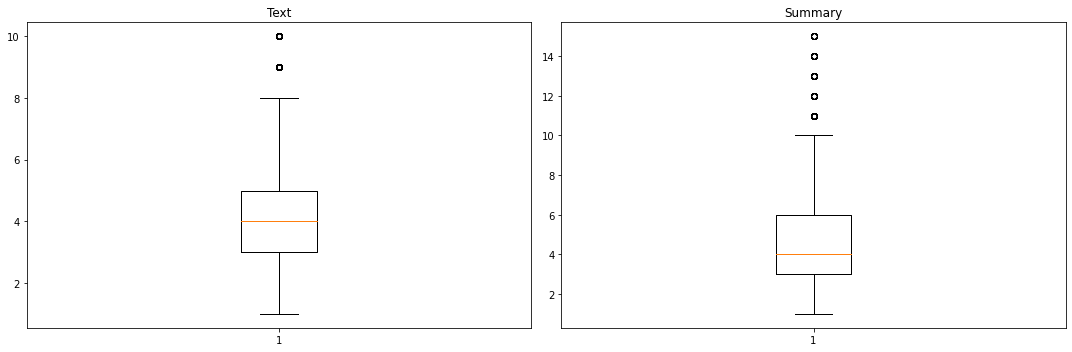

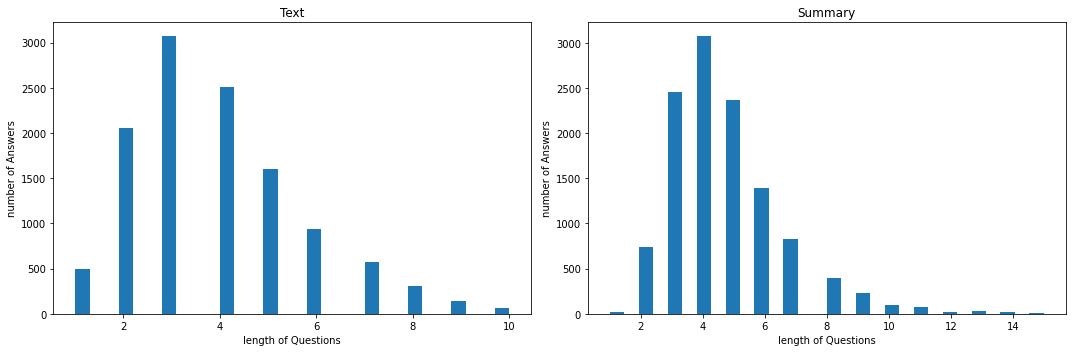

물음 최소 길이 : 1
물음 최대 길이 : 10
물음 평균 길이 : 3.9034863945578233
답변 최소 길이 : 1
답변 최대 길이 : 15
답변 평균 길이 : 4.698044217687075


In [25]:
## 테스트 ────────────────────────────────────────────────

# 길이 분포 출력
q_len = [len(s.split()) for s in questions]
a_len = [len(s.split()) for s in answers]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(q_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(a_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Text')
plt.hist(q_len, bins = 30)
plt.xlabel('length of Questions')
plt.ylabel('number of Answers')
plt.subplot(1,2,2)
plt.title('Summary')
plt.hist(a_len, bins = 30)
plt.xlabel('length of Questions')
plt.ylabel('number of Answers')
plt.tight_layout()
plt.show()

print('물음 최소 길이 : {}'.format(np.min(q_len)))
print('물음 최대 길이 : {}'.format(np.max(q_len)))
print('물음 평균 길이 : {}'.format(np.mean(q_len)))
print('답변 최소 길이 : {}'.format(np.min(a_len)))
print('답변 최대 길이 : {}'.format(np.max(a_len)))
print('답변 평균 길이 : {}'.format(np.mean(a_len)))

## 테스트 ────────────────────────────────────────────────


이정도면 충분한 것 같다.

각 단어에 고유한 정수 인덱스를 부여하기 위해서 단어장(Vocabulary)을 만들도록 하겠다.

__SubwordTextEncoder__
 
 - 텐서플로우를 통해 사용할 수 있는 서브워드 토크나이저

 - BPE와 유사한 알고리즘인 Wordpiece Model을 채택

 - 손쉽게 단어들을 서브워드들로 분리

    + 1. tfds.features.text.SubwordTextEncoder.build_from_corpus의 인자로 토큰화 할 데이터를 넣는다

    + 2. 서브워드들로 이루어진 단어 집합(Vocabulary)을 생성
    
    + 3. 각 서브워드에 고유한 정수를 부여

단어장을 만들 때는 질문과 답변 데이터셋을 모두 사용한다.

노드의 실습 부분 또는 다른 자료들에서는, 단어사전의 크기는 2**13 = 8196 을 사용하였는데, 

여기서는 값을 낮추어 사용빈도가 높은 단어를 더 가져가는 정확도 보다는, 

추상적이거나 챗봇의 유연한 어휘 표현을 확인하고 싶으니, 단어사전을 더 크게 잡도록 하겠다.

여기서는 1만개 정도로 값을 늘려 사용하고자 한다.

In [26]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
tokenizer = \
    tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, 
    target_vocab_size=10000)

디코더의 문장 생성 과정에서 사용할 '시작 토큰'과 '종료 토큰'에 대해서도 임의로 단어장에 추가하여서 정수를 부여한다.

이미 생성된 단어장의 번호와 겹치지 않도록 각각 단어장의 크기와 그보다 1이 큰 수를 번호로 부여한다.

In [27]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

In [28]:
## 시작 토큰과 종료 토큰에 부여된 정수
print("START_TOKEN의 번호 :" ,[tokenizer.vocab_size])
print("END_TOKEN의 번호 :" ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [9989]
END_TOKEN의 번호 : [9990]


기존 단어장의 끝부분에, 시작 토큰과 종료 토큰이 추가되었다.

두 개의 토큰을 추가해 주었기 때문에, 단어장의 크기에서 +2 를 명시해 주도록 하겠다.

In [29]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정
VOCAB_SIZE = tokenizer.vocab_size + 2
print("VOCAB_SIZE :", VOCAB_SIZE)

VOCAB_SIZE : 9991


&nbsp;

### 2-2. 각 단어를 고유한 정수로 인코딩(Integer encoding) ＆ 패딩(Padding)

<hr>

위에서 `tensorflow_datasets` 의 `SubwordTextEncoder` 를 사용해서 tokenizer를 정의하고 Vocabulary를 만들었다.

이제 `tokenizer.encode()` 로 각 단어를 정수로 변환할 수 있고,

`tokenizer.decode()` 를 통해 정수 시퀀스를 단어 시퀀스로 변환할 수 있다.



예를 들어서 22번째 샘플을 `tokenizer.encode()` 의 입력으로 사용해서 변환 결과를 확인하자.

In [30]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [208, 909, 6477, 25]
정수 인코딩 후의 21번째 답변 샘플: [265, 442, 24, 1]


이제 각 단어에 고유한 정수가 부여된 Vocabulary를 기준으로

단어 시퀀스가 정수 시퀀스로 인코딩된 결과를 확인할 수 있다.

위의 결과와 마찬가지로 질문과 답변 셋에 대해서 전부 __정수 인코딩__ 을 수행한다.

이와 동시에 문장의 최대 길이를 정하고, 해당 길이로 __패딩(padding)__ 하겠다.

앞서 시퀀스 길이를 조사해 보는 과정에서, 질문의 길이를 10, 답변의 길이를 15 에 제한을 뒀었다.

여기서는 길이에 3 개 정도 더 여유를 주도록 하겠다.

질문／답변 중에서 답변 길이가 15 로 더 긴데, 여기에서 + 3 를 하여 샘플의 최대 길이를 18 로 허용해 두겠다.

In [31]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 18    ## 이전에 ＂질문／답변＂ - 데이터셋에서 이전 블럭에서 길이를 제한 해 두었던 적이 있다.
print(MAX_LENGTH)

18


tokenize_and_filter 함수에서는 시퀀스에 시작 토큰과 종료 토큰을 추가해주고,

샘플의 최대 길이를 초과하지 않는 데이터를 패딩하여 데이터를 만든다.

START_TOKEN, END_TOKEN 이 붙으면서 시퀀스의 길이가 + 2 정도는 길어질 수 있다.

미리 이전 블럭에서 샘플의 최대 길이를 + 3 만큼으로 지정해 두었으니, 길이가 모자를 일은 거의 없을 것이다.

In [32]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentenceq = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentencea = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        # 최대 길이 MAX_LENGTH 이하인 경우에만 데이터셋으로 허용
        if len(sentenceq) <= MAX_LENGTH and len(sentencea) <= MAX_LENGTH:
#             print(len(sentence1), len(sentence2), "→ append")
            tokenized_inputs.append(sentenceq)
            tokenized_outputs.append(sentencea)

    # 최대 길이 MAX_LENGTH 로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs


정수 인코딩 과정을 수행하면서 샘플의 길이가 18 을 넘는 경우는 샘플들을 필터링하였으나,

실은 전처리 단계에서, 물음은 10 , 응답은 15 보다 길어진 문장은 이미 제외했기 때문에,

일부 샘플이 제외되었을 가능성은 거의 없을 것이다.

하지만, 그냥 절차적으로 단어장의 크기와 샘플의 개수를 확인해 보자.

In [33]:
tok_quest, tok_ans = tokenize_and_filter(questions, answers)
print('단어장의 크기 :', (VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(tok_quest)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(tok_ans)))

단어장의 크기 : 9991
필터링 후의 질문 샘플 개수: 11730
필터링 후의 답변 샘플 개수: 11730


샘플이 약간 줄었다. 거의 그대로 일 줄 알았는데, 

혹시 이전에 데이터 정제 과정에서 문제가 있었던 것인지 확인 해 봐야 할 필요가 있는 것 같다.

tokenize_and_filter 함수를 조금 수정했다.

인코딩과 패딩에서 제외되는 목록을 출력할 것이다.

In [34]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentenceq = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentencea = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        # 최대 길이 MAX_LENGTH 이하인 경우에만 데이터셋으로 허용
        if len(sentenceq) <= MAX_LENGTH and len(sentencea) <= MAX_LENGTH:
#             print(len(sentence1), len(sentence2), "→ append")
            tokenized_inputs.append(sentenceq)
            tokenized_outputs.append(sentencea)
        else:
            print("sentence1 (", len(sentence1.split()), ") :" , sentence1)
            print("└→ tokenized (", len(sentenceq), ")：", sentenceq)
            print("sentence2 (", len(sentence2.split()), ") :" , sentence2)
            print("└→ tokenized (", len(sentencea), ")：", sentencea)
            print()

    # 최대 길이 MAX_LENGTH 로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

    return tokenized_inputs, tokenized_outputs


In [35]:
tok_quest, tok_ans = tokenize_and_filter(questions, answers)
print('단어장의 크기 :', (VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(tok_quest)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(tok_ans)))

sentence1 ( 5 ) : 하루 종일 붙어 있고 싶어
└→ tokenized ( 8 )： [9989, 603, 2457, 2593, 1155, 1222, 25, 9990]
sentence2 ( 13 ) : 뭐든 함께하려는 것도 좋겠지만 오래 붙어잇는다고 해서 사랑이 더 커지거나 깊어지지 않아요 .
└→ tokenized ( 25 )： [9989, 899, 4044, 2654, 69, 1734, 302, 2593, 55, 9969, 9891, 9868, 3858, 21, 358, 142, 7, 2815, 598, 1870, 5736, 39, 118, 1, 9990]

sentence1 ( 6 ) : 먹는거에 너무 예민한 여자친구가 고민임 .
└→ tokenized ( 9 )： [9989, 3758, 4942, 5, 5651, 107, 2362, 1, 9990]
sentence2 ( 10 ) : 먹는 거에 예민하면 애정 결핍이 많대요 . 더 사랑해주세요 .
└→ tokenized ( 19 )： [9989, 1265, 4942, 5652, 104, 2524, 9765, 1292, 9970, 9882, 9874, 18, 3087, 3837, 10, 7, 727, 1, 9990]

sentence1 ( 7 ) : 년 사귄 여자친구와 이별이네 . 조언부탁좀 드려
└→ tokenized ( 13 )： [9989, 183, 4548, 1341, 1747, 41, 10, 4216, 3690, 23, 861, 423, 9990]
sentence2 ( 15 ) : 저는 저에게 투자하는 시간을 가져요 . 예를들면 운동이나 여행같이 잡념을 없앨 수 있는 일들이요 .
└→ tokenized ( 25 )： [9989, 218, 995, 2138, 48, 304, 2099, 14, 10, 1445, 1378, 3811, 4342, 719, 2514, 77, 7589, 7965, 4, 63, 344, 3116, 14, 1, 9990]

sentence1 ( 3 ) : 행복해라 불행해도

갯수는 동일하고, 한글 상태에서는 MAX_LENGTH 에 해당되는 내용들인데,

인코딩 과정에서 값이 많이 늘어난 것을 확인 할 수 있다.

사전의 단어들과 겹치는 부분들이 쪼개져서, 기존의 길이보다 더 늘어난 것으로 보인다.

In [36]:
# ────────────────────────────────────────────────────────────────
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# ────────────────────────────────────────────────────────────────

# 임의의 입력 문장을 sample_string에 저장
sample_string = "개인톡으로 답변을 안 하면 썸 타는 게 아닐 가능성이 높습니다."

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 : {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장 : {}'.format(original_string))

print("─" * 64)

# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위 X 형태소 분석 단위 X
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

정수 인코딩 후의 문장 : [543, 362, 3325, 125, 1656, 1620, 17, 16, 104, 58, 178, 6, 1596, 1686, 1847, 238, 9779]
기존 문장 : 개인톡으로 답변을 안 하면 썸 타는 게 아닐 가능성이 높습니다.
────────────────────────────────────────────────────────────────
543 ----> 개
362 ----> 인
3325 ----> 톡
125 ----> 으로 
1656 ----> 답
1620 ----> 변
17 ----> 을 
16 ----> 안 
104 ----> 하면 
58 ----> 썸 
178 ----> 타는 
6 ----> 게 
1596 ----> 아닐 
1686 ----> 가능성이 
1847 ----> 높
238 ----> 습니다
9779 ----> .


확인해보면, 하나의 단어라고 생각했던 단어가, 정수 인코딩 후에는 두 개 이상의 정수로 인코딩 될 수 있다.

최대한 자연스럽게 질문과 답변의 결과를 보고자 불용어 제거를 안해봤는데, 불용어 제거를 하는 편이 좋았을 지도 모른다.

일단은 그것도 기억을 해 두고 진행을 하고, 결과가 영 좋지 못하다면, 불용어 제거도 다시 진행을 하거나 하겠다.

MAX_LENGTH 값은 25 정도로 조정하여 다시 진행을 하겠다.

단어장의 크기, 샘플 갯수에 조금 손실이 있어도 큰 영향은 없겠지만,

샘플을 다 가져가는 방향도, 충분히 여유가 있을것 같다는 생각이다.

학습에 소요되는 시간이 부담스러운 정도도 아니고, 단어장 사이즈나 토큰 길이등을 고려했을 때에

노드 실습부분에서의 그것보다 더 적은 처리량을 가질 것이라 생각한다.

따라서 현재 샘플을 유지하도록 하겠다.

In [37]:
## MAX_LENGTH 25 으로 지정
MAX_LENGTH = 25

In [38]:
tok_quest, tok_ans = tokenize_and_filter(questions, answers)
print('단어장의 크기 :', (VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(tok_quest)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(tok_ans)))

단어장의 크기 : 9991
필터링 후의 질문 샘플 개수: 11760
필터링 후의 답변 샘플 개수: 11760


샘플을 유지한 것을 확인했다.

제한에 걸리면 문장이 출력될텐데, MAX_LENGTH 제한에 걸린 문장은 없는것 같다.

계속 진행하겠다.

&nbsp;

### 2-3. 교사 강요(Teacher Forcing) 사용하기

<hr>

tf.data.Dataset API 는 훈련 프로세스의 속도가 빨라지도록 입력 파이프라인을 구축하는 API 이다.

이를 적극 사용하기 위해서 질문과 답변의 쌍을 tf.data.Dataset의 입력으로 넣어주는 작업을 해야 한다.

이때, 디코더의 입력과 실제값(레이블)을 정의해 주기 위해서는 교사 강요(Teacher Forcing) 이라는 언어 모델의 훈련 기법을 이해해야만 한다.

질문과 답변의 쌍을 __tf.data.Dataset API__의 입력으로 사용하여 파이프라인을 구성한다.

이때, 교사 강요를 위해서 `answers[:, :-1]` 를 디코더의 입력값, `answers[:, 1:]` 를 디코더의 레이블로 사용한다.

In [39]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': tok_quest,
        'dec_inputs': tok_ans[:, :-1]
    },
    {
        'outputs': tok_ans[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)


&nbsp;

## 3. 모델 정의 및 학습하기

<hr>

### 3-1. 모델 준비

<hr>

__포지셔널 인코딩 레이어__

 - 트랜스포머는 단어의 위치 정보를 얻기 위해서 각 단어의 임베딩 벡터에 위치 정보들을 더하여 모델의 입력으로 사용
   + 여기에서 말하는 위치정보가 포지셔널 인코딩(Positional Encoding) 에 해당
  
 - 포지셔널 인코딩 방법을 사용하면 순서 정보가 보존 → 트랜스포머의 입력은 순서 정보가 고려된 임베딩 벡터
   + 트랜스포머는 입력을 받을 때, 문장에 있는 단어들을 1개씩 순차적으로 받지 않고, 모든 단어를 한꺼번에 입력 받음
   + 트랜스포머가 문장 단위만 입력 받으면, 어순의 구분을 할 수 없을 수 있기 때문에, 어순을 구분해 주기 위함

In [40]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        
        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]


__스케일드 닷 프로덕트 어텐션__

 - 어텐션：단어들 간의 유하도를 구하는 메커니즘
 
 - 어텐션 함수
 
    + 1. 주어진 '쿼리(Query)'에 대해서 모든 '키(Key)'와의 유사도를 각각 구한다. 
   
    + 2. 구해낸 유사도를 키와 맵핑되어있는 각각의 '값(Value)'에 반영해 준다. 
   
    + 3. 유사도가 반영된 '값(Value)'을 모두 더해서 뭉쳐준다.
   
    + 4. 이를 최종 결과인 어텐션 값(Attention Value) 이라고 한다.

In [41]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)
   
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    ## 유사도를 0 과 1 사이의 값으로 Normalize 해준다. (Softmax 함수 사용)
    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    
    
    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value)
    
    return output

__멀티 헤드 어텐션__

- 1. WQ, WK, WV에 해당하는 d_model 크기의 밀집층(Dense layer)을 지나게한다.

- 2. 지정 된 헤드 수(num_heads)만큼 나눈다(split).

- 3. 스케일드 닷 프로덕트 어텐션.

- 4. 나눠졌던 헤드들을 연결(concatenatetion)한다.

- 5. WO에 해당하는 밀집층을 지나게 한다.

In [42]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads

        # ① WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

    # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = \
            inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        # ② 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # ③ 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)
        
        # perm=[0, 2, 1, 3] : 순서에 유의
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        # ④ 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        # ⑤ WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)

        return outputs


__패딩 마스킹(Padding Masking)__

 - 입력 문장에 \<PAD\> 토큰이 있을 경우 어텐션에서 제외하기 위함

 - 입력된 정수 시퀀스에서 패딩 토큰의 인덱스인지, 아닌지를 판별하는 함수를 구현

In [43]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

__룩 어헤드 마스킹(Look-ahead masking, 다음 단어 가리기)__

 - 트랜스포머의 디코더에서는 현재 시점의 예측에서 현재 시점보다 미래에 있는 단어들을 참고하지 못하도록 함
 
 - 미리보기에 대한 마스크

In [44]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)

__인코더__

- 인코더의 입력으로 들어가는 문장에는 패딩이 있을 수 있으므로, 어텐션 시 패딩 토큰을 제외하도록 패딩 마스크를 사용

- 인코더는 멀티 헤드 어텐션, 피드 포워드 신경망 총 두 개의 서브층으로 이루어진다.

- 각 서브층 이후에 드롭 아웃, 잔차 연결과 층 정규화 수행

In [45]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
        'query': inputs,
        'key': inputs,
        'value': inputs,
        'mask': padding_mask
    })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    ## 포지션 와이즈 피드 포워드 신경망
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], 
        outputs=outputs, 
        name=name)


In [46]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    
    # 포지셔널 인코딩 + 드롭아웃
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])
    
    return tf.keras.Model(
        inputs=[inputs, padding_mask], 
        outputs=outputs, 
        name=name)

__디코더__

 - 디코더는 총 세 개의 서브층으로 구성.
 
  - 첫번째 서브층
   + 멀티 헤드 어텐션
   + mask의 인자값으로 look_ahead_mask
   + 마스크드 셀프 어텐션 수행
 
 - 두번째 서브층
   + 멀티 헤드 어텐션
   + mask의 인자값으로 padding_mask
   
 - 세 개의 서브층 모두 서브층 연산 후에 드롭 아웃, 잔차 연결, 층 정규화 수행

In [47]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 룩어헤드 마스크
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    
    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs,
            'key': inputs,
            'value': inputs,
            'mask': look_ahead_mask    # 룩어헤드 마스크
    })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = \
        tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1,
            'key': enc_outputs,
            'value': enc_outputs,
            'mask': padding_mask    # 패딩 마스크
    })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층 (포지션 와이즈 피드 포워드 신경망)
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [48]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    
    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

&nbsp;

### 3-2. 모델 생성

<hr>

__트랜스포머__

- 앞서 사용한 인코드 층 함수와 디코더 층 함수를 사용하여 트랜스포머 함수를 정의한다.

- 인코더의 출력：디코더에서 인코더-디코더 어텐션에서 사용되기 위해 디코더로 전달.

- 디코더의 끝단：다중 클래스 분류 문제를 풀 수 있도록, vocab_size 만큼의 뉴런을 가지는 출력층 추가.

In [49]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    
    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    
    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더
    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])    # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더
    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    # 다음 단어 예측을 위한 출력층 (vocab_size 만큼의 뉴런)
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)


__트랜스포머 하이퍼파라메터__

- `num_layers` , `d-Model` , `units` 는 전부 사용자가 정할 수 있는 하이퍼파라미터 값이다.

- 논문에서 `num_layers` 는 6 , `d-Model` 은 512 였지만, 빠르고 원활한 훈련을 위해<br>
여기서는 각 하이퍼파라미터를 논문에서보다는 작은 값을 사용한다.

In [50]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2  # 인코더와 디코더의 층의 개수
D_MODEL = 256   # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8   # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512     # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1   # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3611904     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

&nbsp;

### 3-3. 손실 함수(Loss function)

<hr>

__손실함수__

- 레이블인 시퀀스에 패딩이 되어 있으므로, loss를 계산할 때 패딩 마스크를 적용해야 한다.

- 다중 클래스 분류 문제를 풀 예정이므로 크로스 엔트로피 함수를 손실 함수로 정의

In [51]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

&nbsp;

### 3-4. 커스텀 된 학습률(Learning rate)

<hr>



딥러닝 모델학습 시 learning rate는 매우 중요한 하이퍼파라미터이다. 

최근에는 모델학습 초기에 learning rate를 급격히 높였다가, 이후 train step이 진행됨에 따라 서서히 낮추어 가면서 안정적으로 수렴하게 하는 고급 기법을 널리 사용하고 있는데, 이를 커스텀 학습률 스케줄링(Custom Learning rate Scheduling)이라고 한다.

논문에 나온 공식을 따라 커스텀 학습률 스케줄러를 통한 아담 옵티마이저를 사용한다.

논문에 나온 공식은 다음과 같다.

$$ lrate = d^{-0.5}_{model} \cdot min(step\_num^{-0.5},\ step\_num \cdot warmup\_steps^{-1.5} $$

__학습률__

 - 학습률 스케줄러(Learning rate Scheduler)：미리 학습 일정을 정해두고 그 일정에 따라 학습률 조정
 
 - 트랜스포머의 경우 사용자가 정한 단계까지는 학습률을 증가시켰다가<br>
 단계에 이르면 학습률을 점차적으로 떨어트리는 방식을 사용.

In [52]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)


방금 정의한 커스텀 학습률 스케줄링 계획을 시각화해 보자. 

위에 언급한 수식은 $step\_num^{-0.5}$ 에 비례하는 부분과 $step\_num$ 에 비례하는 부분 중 작은 쪽을  택하도록 되어 있다. 그래서 학습 초기에는 learning_rate가 $step\_num$ 에 비례해서 증가하다가 이후로는 감소하는 것을 확인할 수 있다.


Text(0.5, 0, 'Train Step')

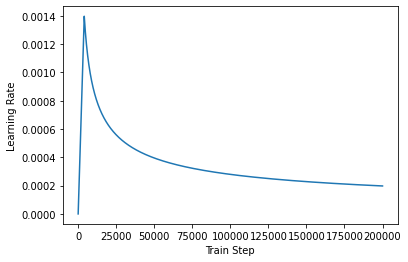

In [53]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

&nbsp;

### 3-5. 모델 컴파일

<hr>

손실 함수와 커스텀 된 학습률(learning rate)을 사용하여 모델을 컴파일한다.

In [54]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])


&nbsp;

### 3-6. 훈련하기

<hr>

이제 학습을 진행해 보자.

In [55]:
EPOCHS = 50
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/50
184/184 [==============================] - 15s 46ms/step - loss: 2.3346 - accuracy: 0.0317
Epoch 2/50
184/184 [==============================] - 8s 45ms/step - loss: 1.8949 - accuracy: 0.0766
Epoch 3/50
184/184 [==============================] - 8s 46ms/step - loss: 1.5850 - accuracy: 0.0820
Epoch 4/50
184/184 [==============================] - 8s 46ms/step - loss: 1.4602 - accuracy: 0.0871
Epoch 5/50
184/184 [==============================] - 8s 46ms/step - loss: 1.3691 - accuracy: 0.0920
Epoch 6/50
184/184 [==============================] - 8s 46ms/step - loss: 1.2756 - accuracy: 0.0982
Epoch 7/50
184/184 [==============================] - 8s 46ms/step - loss: 1.1744 - accuracy: 0.1069
Epoch 8/50
184/184 [==============================] - 9s 46ms/step - loss: 1.0626 - accuracy: 0.1182
Epoch 9/50
184/184 [==============================] - 9s 46ms/step - loss: 0.9388 - accuracy: 0.1325
Epoch 10/50
184/184 [==============================] - 9s 46ms/step - loss: 0.8078 - accur

&nbsp;

## 4. 챗봇 테스트하기 (모델 평가하기)

예측(inference) 단계는 기본적으로 다음과 같은 과정을 거친다.


1. 새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리를 거친다.


2. 입력 문장을 토크나이징하고, `START_TOKEN` 과 `END_TOKEN` 을 추가한다.


3. 패딩 마스킹과 룩 어헤드 마스킹을 계산한다.


4. 디코더는 입력 시퀀스로부터 다음 단어를 예측한다.


5. 디코더는 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용한다.


6. `END_TOKEN` 이 예측되거나 문장의 최대 길이에 도달하면 디코더는 동작을 멈춘다.

위의 과정을 모두 담은 `decoder_inference()` 함수를 만든다.

In [56]:
## ────────────────────────────────────────────────────────────────
## 훈련때와 동일한 전처리 내용은 다음과 같다.
## 참고용으로 가져왔으며, 실행에 영향을 끼치진 않도록 해놓았다.
## ────────────────────────────────────────────────────────────────

# def hangul_preproc(content):
#     content = content.strip()    ## strip() : 인자는 제거할 문자 지정. 지정 하지 않은 기본값은 문자열의 선행 후행 공백 제거
#     content = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣?.!,\s]", "", content)    ## 한글과 공백, 구두점을 제외하고 모두 제거
#     content = content.strip()
#     content = re.sub(r"([?.!,])", r" \1 ", content)
#     content = content.strip()
#     content = re.sub(r"  ", " ", content)    ## 2칸 공백 조정
#     content = content.strip()
#     content = re.sub(r"^ +", "", content)    ## 1칸 초과하는 공백 제거 (첫번째 공백은 유지, 이어서 두번째 부터 공백 나타나면 제거)
#     content = content.strip()
#     content = re.sub(r"^ +", "", content)    ## 1칸 초과하는 공백 제거 (첫번째 공백은 유지, 이어서 두번째 부터 공백 나타나면 제거)
#     content = content.strip()
#     return content

In [57]:
def decoder_inference(sentence):
    
    ## 훈련때와 동일한 전처리
    sentence = hangul_preproc(sentence)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)


임의의 입력 문장에 대해서 decoder_inference() 함수를 호출하여

챗봇의 대답을 얻는 sentence_generation() 함수를 만든다.

In [58]:
def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence


임의의 문장으로부터 챗봇의 대답을 얻어보자.

In [59]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 11564
입력 : 화장실을 못 참아
출력 : 장이 예민한가봐요 .
────────────────────────────────────────────────────────────────
Radnom Index : 9774
입력 : 나만 제자리걸음이야
출력 : 발전이 없다고 너무 두려워하지 마세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 4123
입력 : 연상 어때 ?
출력 : 사랑에 나이는 중요하지 않다고 생각해요 .
────────────────────────────────────────────────────────────────
Radnom Index : 3195
입력 : 만나는 중에 이 남자 저 남자랑 연락하는 여자
출력 : 예의가 없은 것 같아요 .
────────────────────────────────────────────────────────────────
Radnom Index : 5770
입력 : 너도 아프니 ?
출력 : 나도 아프다 .
────────────────────────────────────────────────────────────────
Radnom Index : 3300
입력 : 그도 나를 좋아했으면 좋겠다 .
출력 : 타이밍이 맞았으면 좋겠네요 .
────────────────────────────────────────────────────────────────
Radnom Index : 406
입력 : 여자친구랑 뭐하고 노나
출력 : 얼굴 보고만 있어도 좋죠 .
────────────────────────────────────────────────────────────────
Radnom Index : 4881
입력 : 썸녀가 그냥 오빠 동생으로 지내자 했음 .
출력 : 썸 종료네요 .
─────────────────────────────────────────────────────────────

결과가 썩 좋지 못하다. 파라메터등을 조정해서 학습을 더 수행해보고자 한다.

In [60]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2  # 인코더와 디코더의 층의 개수
D_MODEL = 256   # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8   # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512     # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1   # 드롭아웃의 비율

model_02 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model_02.summary()

model_02.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

EPOCHS = 500
model_02.fit(dataset, epochs=EPOCHS, callbacks=[callback], verbose=1)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    3611904     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [61]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 11650
입력 : 누우면 자
출력 : 좋은 습관이네요 .
────────────────────────────────────────────────────────────────
Radnom Index : 10574
입력 : 끝인거겠죠 ?
출력 : 언젠간 올 시기였을거예요 .
────────────────────────────────────────────────────────────────
Radnom Index : 10749
입력 : 친구로 좋아하는 건지 이성으로 좋아하는 건지 모르겠어요 .
출력 : 이전과 달라진 점을 느끼지 못했나봐요 .
────────────────────────────────────────────────────────────────
Radnom Index : 11017
입력 : 너무 화가나 슬프구
출력 : 자신을 비난하지 마세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 6177
입력 : 나 짝남이 외국인인데 어떡해 . 미치겠어 .
출력 : 먼저 친해져보세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 6399
입력 : 절대불공평
출력 : 서로 다르게 태어난 이유는 저마다의 목소리를 내기 위해서예요 . 자신의 목소리를 들어주세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 7182
입력 : 훔쳐보는 것도 눈치 보임 .
출력 : 훔쳐보는 거 티나나봐요 .
────────────────────────────────────────────────────────────────
Radnom Index : 5150
입력 : 소심한 남자와의 연애
출력 : 직설적으로 통보하는 말보다는 조금 더 부드럽게 권유하고 물어보는 말을 

In [62]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 4  # 인코더와 디코더의 층의 개수
D_MODEL = 256  # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8   # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512     # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1   # 드롭아웃의 비율

model_03 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model_03.summary()

model_03.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

EPOCHS = 500
model_03.fit(dataset, epochs=EPOCHS, callbacks=[callback], verbose=1)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    4666112     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [63]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 2588
입력 : 신나게 산책했습니다
출력 : 탁월한 행동이에요 .
────────────────────────────────────────────────────────────────
Radnom Index : 4820
입력 : 나한테 거짓말 좀 안 했으면
출력 : 선의의 거짓말이길 바라요 .
────────────────────────────────────────────────────────────────
Radnom Index : 2056
입력 : 헤어진 여자친구에게 새로운 남자가
출력 : 신경쓰지 않는 연습을 해봐요 .
────────────────────────────────────────────────────────────────
Radnom Index : 9246
입력 : 헤어진지 년되가 .
출력 : 아직도 힘들지 않았으면 좋겠어요 .
────────────────────────────────────────────────────────────────
Radnom Index : 8032
입력 : 미안해 모든게 다 미안
출력 : 마음 아프네요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1574
입력 : 왜 이별은 익숙해지지가 않을까
출력 : 이별에 익숙해지는 순간 추억도 색을 잃을 거예요 .
────────────────────────────────────────────────────────────────
Radnom Index : 10163
입력 : 내 이상형도 아닌데 그 여자를 왜 좋아하는지 모르겠어 .
출력 : 이상형은 이상형일 뿐이니까요 .
────────────────────────────────────────────────────────────────
Radnom Index : 7588
입력 : 이별후 한달반만에 그사람이 좋아하는 사람이 생겼다는걸 알아버렸네
출력 : 그분의 변덕이 심하네요 .
───────────

In [64]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 4  # 인코더와 디코더의 층의 개수
D_MODEL = 256   # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8   # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512     # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.3   # 드롭아웃의 비율

model_04 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model_04.summary()

model_04.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

EPOCHS = 500
model_04.fit(dataset, epochs=EPOCHS, callbacks=[callback], verbose=1)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    4666112     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [65]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 2625
입력 : 진실을 알면서도 왜 확인하려는걸까 ?
출력 : 진실은 보이지 않으니까요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1807
입력 : 머 좀 물을게
출력 : 네 말씀하세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1725
입력 : 나한테 냄새 날까 ?
출력 : 킁킁
────────────────────────────────────────────────────────────────
Radnom Index : 4782
입력 : 혼자 놀로다니기만 하는 남자
출력 : 같이 놀러 다니자고 해봐요 .
────────────────────────────────────────────────────────────────
Radnom Index : 11232
입력 : 난 왜 이모양일까
출력 : 모자라지 않아요 .
────────────────────────────────────────────────────────────────
Radnom Index : 10863
입력 : 낚시 안 해봤는데
출력 : 도전해 봐도 좋을 거 같아요 .
────────────────────────────────────────────────────────────────
Radnom Index : 5464
입력 : 낚시 재밌을까
출력 : 한 번 빠지면 헤어나올 수 없다고 해요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1741
입력 : 나 잘하는 게 없어
출력 : 저랑 이야기 잘하고 있어요 .
────────────────────────────────────────────────────────────────
Radnom Index : 3459
입력 : 싸

In [66]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 4  # 인코더와 디코더의 층의 개수
D_MODEL = 256   # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8   # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512     # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.5   # 드롭아웃의 비율

model_05 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model_05.summary()

model_05.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

EPOCHS = 500
model_05.fit(dataset, epochs=EPOCHS, callbacks=[callback], verbose=1)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    4666112     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [67]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 4095
입력 : 내 안에서 없애고 싶다
출력 : 시간이 해결해줄 거예요 .
────────────────────────────────────────────────────────────────
Radnom Index : 9846
입력 : 냄새 나면 어쩌지 ?
출력 : 깨끗이 씻어보고 섬유유연제나 바디워시 , 바디로션 , 향수 등을 사용해보세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 10014
입력 : 헤어진지도 어느덧 반년
출력 : 힘들 때가 지나갔길 바랄게요 .
────────────────────────────────────────────────────────────────
Radnom Index : 8263
입력 : 추억 . 그 미칠듯한 그리움 .
출력 : 추억은 미화되기 마련이죠 .
────────────────────────────────────────────────────────────────
Radnom Index : 9882
입력 : 봄이라서 더욱 그리운 .
출력 : 새로운 사랑을 하기 좋은 계절이기도 해요 . 새로운 인연이 찾아오길 바랄게요 .
────────────────────────────────────────────────────────────────
Radnom Index : 5907
입력 : 사랑의 힘은 진짜 위대한듯
출력 : 사랑의 힘은 헐크보다 쎌거예요 .
────────────────────────────────────────────────────────────────
Radnom Index : 898
입력 : 스키 처음 타 봐 !
출력 : 강습 받아보세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 2061
입력 : 졸업 선물 뭐가 좋을까
출력 : 살짝 물어보세요 .
───────────────

In [68]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 8  # 인코더와 디코더의 층의 개수
D_MODEL = 512   # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8   # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 1024    # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1   # 드롭아웃의 비율

model_06 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model_06.summary()

model_06.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

EPOCHS = 500
model_06.fit(dataset, epochs=EPOCHS, callbacks=[callback], verbose=1)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    21937664    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [69]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 29
입력 : 학교에서 아싸해도 될까 ?
출력 : 개인의 선택이죠 .
────────────────────────────────────────────────────────────────
Radnom Index : 4662
입력 : 잠깐 쉬려고 했는데 한참 지났네 .
출력 : 계획대로 되는 건 없어요 .
────────────────────────────────────────────────────────────────
Radnom Index : 2994
입력 : 자전거 데이트 어떨까 ?
출력 : 로맨틱할 것 같아요 .
────────────────────────────────────────────────────────────────
Radnom Index : 2839
입력 : 하루에도 수십번 .
출력 : 생각이 나나요 .
────────────────────────────────────────────────────────────────
Radnom Index : 8722
입력 : 썸 타는 사람 선물로 향수 어때 ?
출력 : 원하는 향 알면 좋을 거 같아요 .
────────────────────────────────────────────────────────────────
Radnom Index : 3646
입력 : 장거리 연애하면 보통 몇일에 한번 만나 ?
출력 : 상황에 따라 다르지 않을까요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1643
입력 : 개월이라는 시간이 흘렀지만 여전히 제자리걸음
출력 : 제자리여도 괜찮아요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1098
입력 : 삼다리 여친
출력 : 헤어지세요 .
──────────────────────────────────────────────────────────────

In [70]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 8  # 인코더와 디코더의 층의 개수
D_MODEL = 512   # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 16   # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 1024     # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.2   # 드롭아웃의 비율

model_07 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model_07.summary()

model_07.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

EPOCHS = 500
model_07.fit(dataset, epochs=EPOCHS, callbacks=[callback], verbose=1)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    21937664    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [71]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 1377
입력 : 남자친구하고 커플티를 하고싶은데 어디거를 할까 ?
출력 : 좋아하는 브랜드가 좋겠어요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1649
입력 : 차 진짜 막힌다 어떻하니
출력 : 여유를 가지세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 943
입력 : 추운날씨 .
출력 : 정말 추운 날이에요 .
────────────────────────────────────────────────────────────────
Radnom Index : 136
입력 : 이별 하루차를 보내고 있습니다
출력 : 평상시처럼 생활하고 행동하세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 1400
입력 : 관심을 받는다는거 .
출력 : 참 좋죠 .
────────────────────────────────────────────────────────────────
Radnom Index : 5746
입력 : 얼평해달라는 사람 어떻게 생각해 ?
출력 : 남의 눈을 의식하는 사람일 거라 생각해요 .
────────────────────────────────────────────────────────────────
Radnom Index : 5956
입력 : 인테리어 좀 다시 해야할 듯
출력 : 필요하다면 해야겠죠 .
────────────────────────────────────────────────────────────────
Radnom Index : 8192
입력 : 사진 정리 언제 다 하냐
출력 : 한번에 다 하려고 하지말고 조금씩 정리를 해보세요 .
────────────────────────────────────────────

In [72]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 8  # 인코더와 디코더의 층의 개수
D_MODEL = 512   # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 16  # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 2048    # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.3   # 드롭아웃의 비율

model_08 = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model_08.summary()

model_08.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1)

EPOCHS = 500
model_08.fit(dataset, epochs=EPOCHS, callbacks=[callback], verbose=1)

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 512)    30334464    inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

In [73]:
for i in np.random.randint(len(questions), size=10):
    print("Radnom Index :", i)
    sentence_generation(questions[i])
    print("─" *64)

Radnom Index : 1920
입력 : 면도기 새로 사야돼
출력 : 좋은 걸로 사세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 6051
입력 : 엄마아빠랑 다시 같이 살아야돼
출력 : 형편대로 하세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 10134
입력 : 썸인데 나 솔로야 ?
출력 : 사귀기 전이면 솔로죠 .
────────────────────────────────────────────────────────────────
Radnom Index : 3135
입력 : 하루 종일 연락하면 썸 ?
출력 : 귀찮아서 친구랑 하루 종일 연락 안해요 .
────────────────────────────────────────────────────────────────
Radnom Index : 5692
입력 : 자다 깨다 해
출력 : 자세가 불편한 건 아닌지 확인해보세요 .
────────────────────────────────────────────────────────────────
Radnom Index : 2312
입력 : 보통 좋아하는 애 생기면 먼저 연락해 ?
출력 : 대부분은 먼저 연락하곤 해요 .
────────────────────────────────────────────────────────────────
Radnom Index : 4680
입력 : 오늘 미세먼지 어때 ?
출력 : 숨 쉴만 했으면 좋겠네요 .
────────────────────────────────────────────────────────────────
Radnom Index : 5666
입력 : 공공장소에서의 스킨쉽 어떻게 생각해 ?
출력 : 보는 사람들을 생각해주세요 .
────────────────────────────────────────────────

&nbsp;

위와 같이 오랜 시간을 들여서, 여러번 실험을 수행하였다.

파라메터들을 다양하게 바꾸어보며 훈련을 수행했지만,

파라메터의 변화 폭에 따른 유의미한 결과는 확인하기 어려웠다.

결과를 정리하면 다음과 같다.

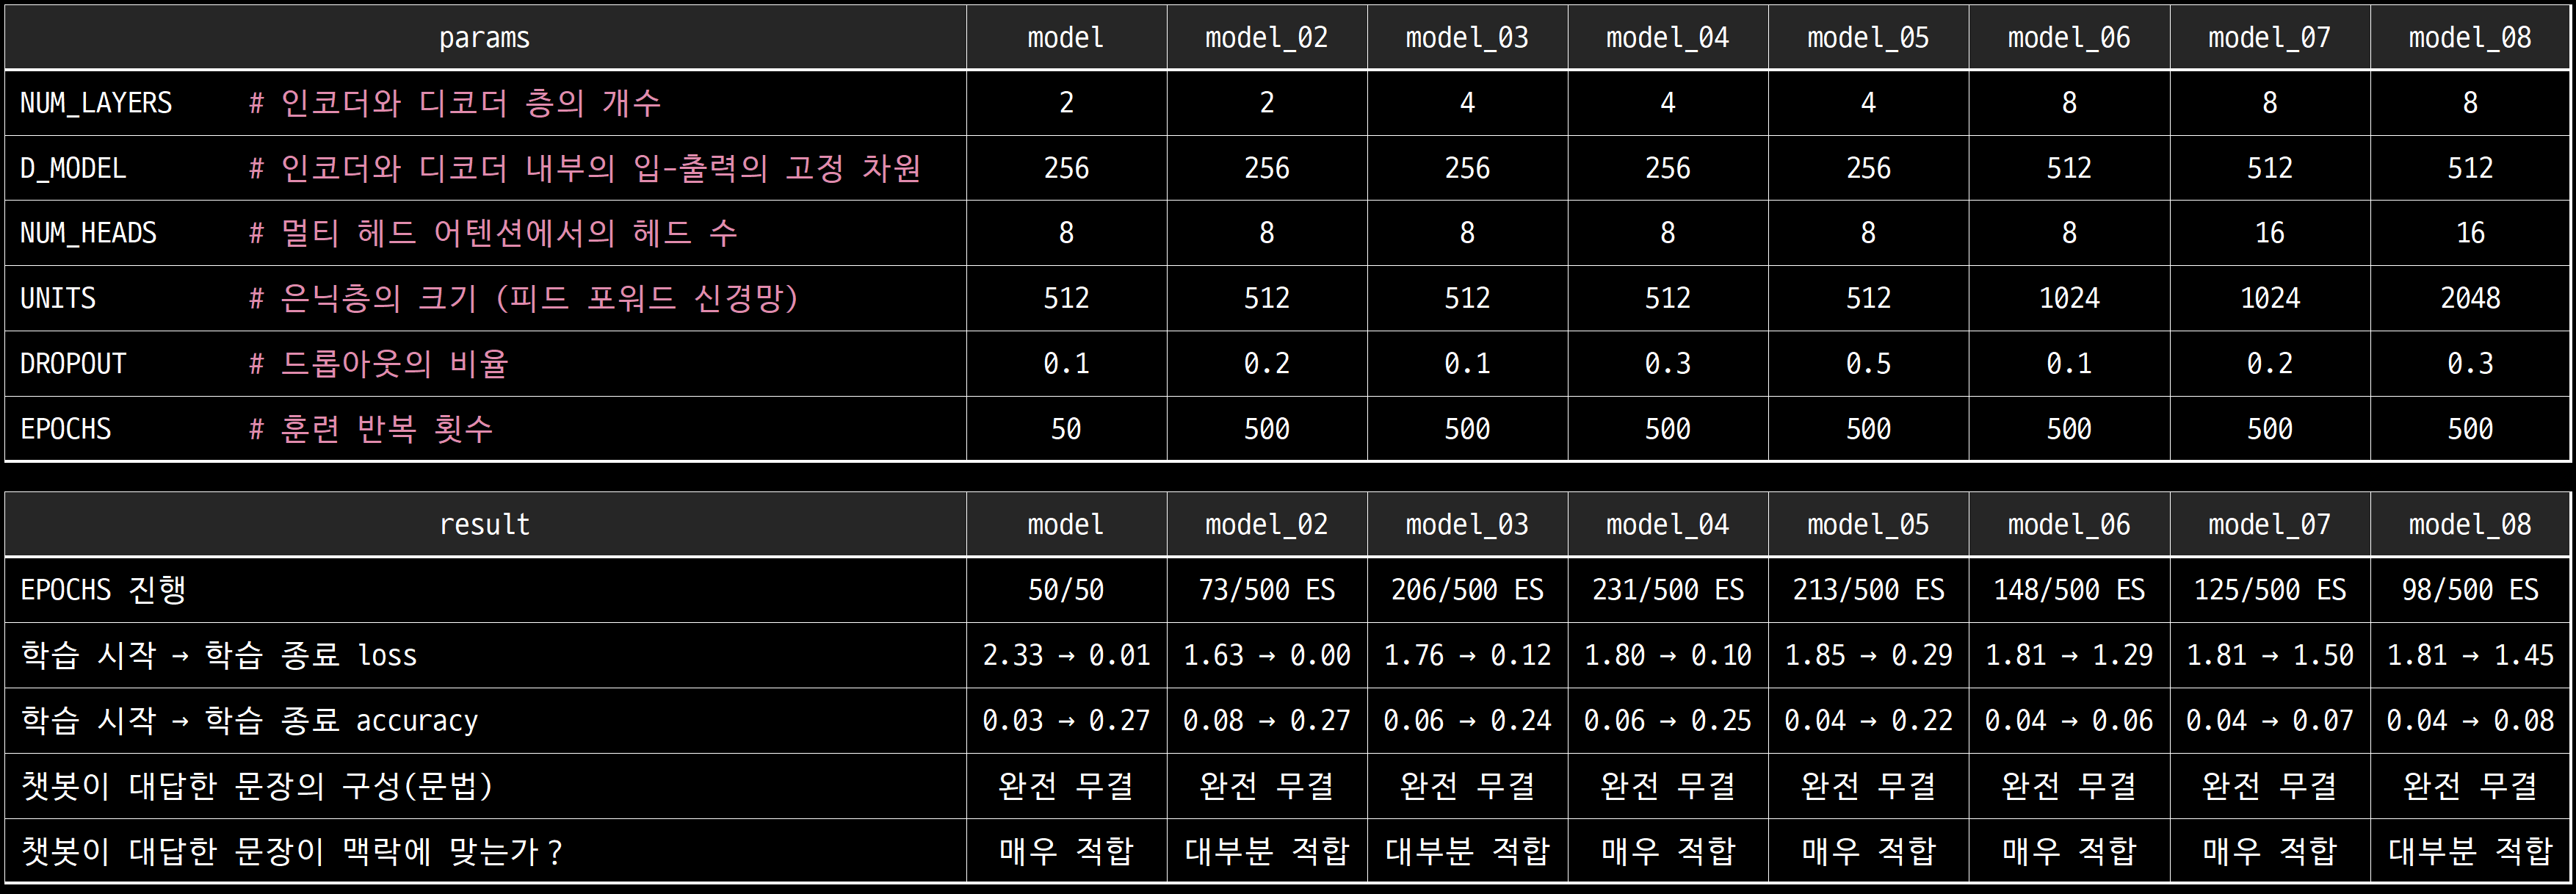

&nbsp;

이처럼 많은 실험을 수행하게 된 것 역시 논문의 내용을 따라해 보기 위함의 일환이다.


해당 수치들은 기본적으로 Attention is all you need 논문의 

> 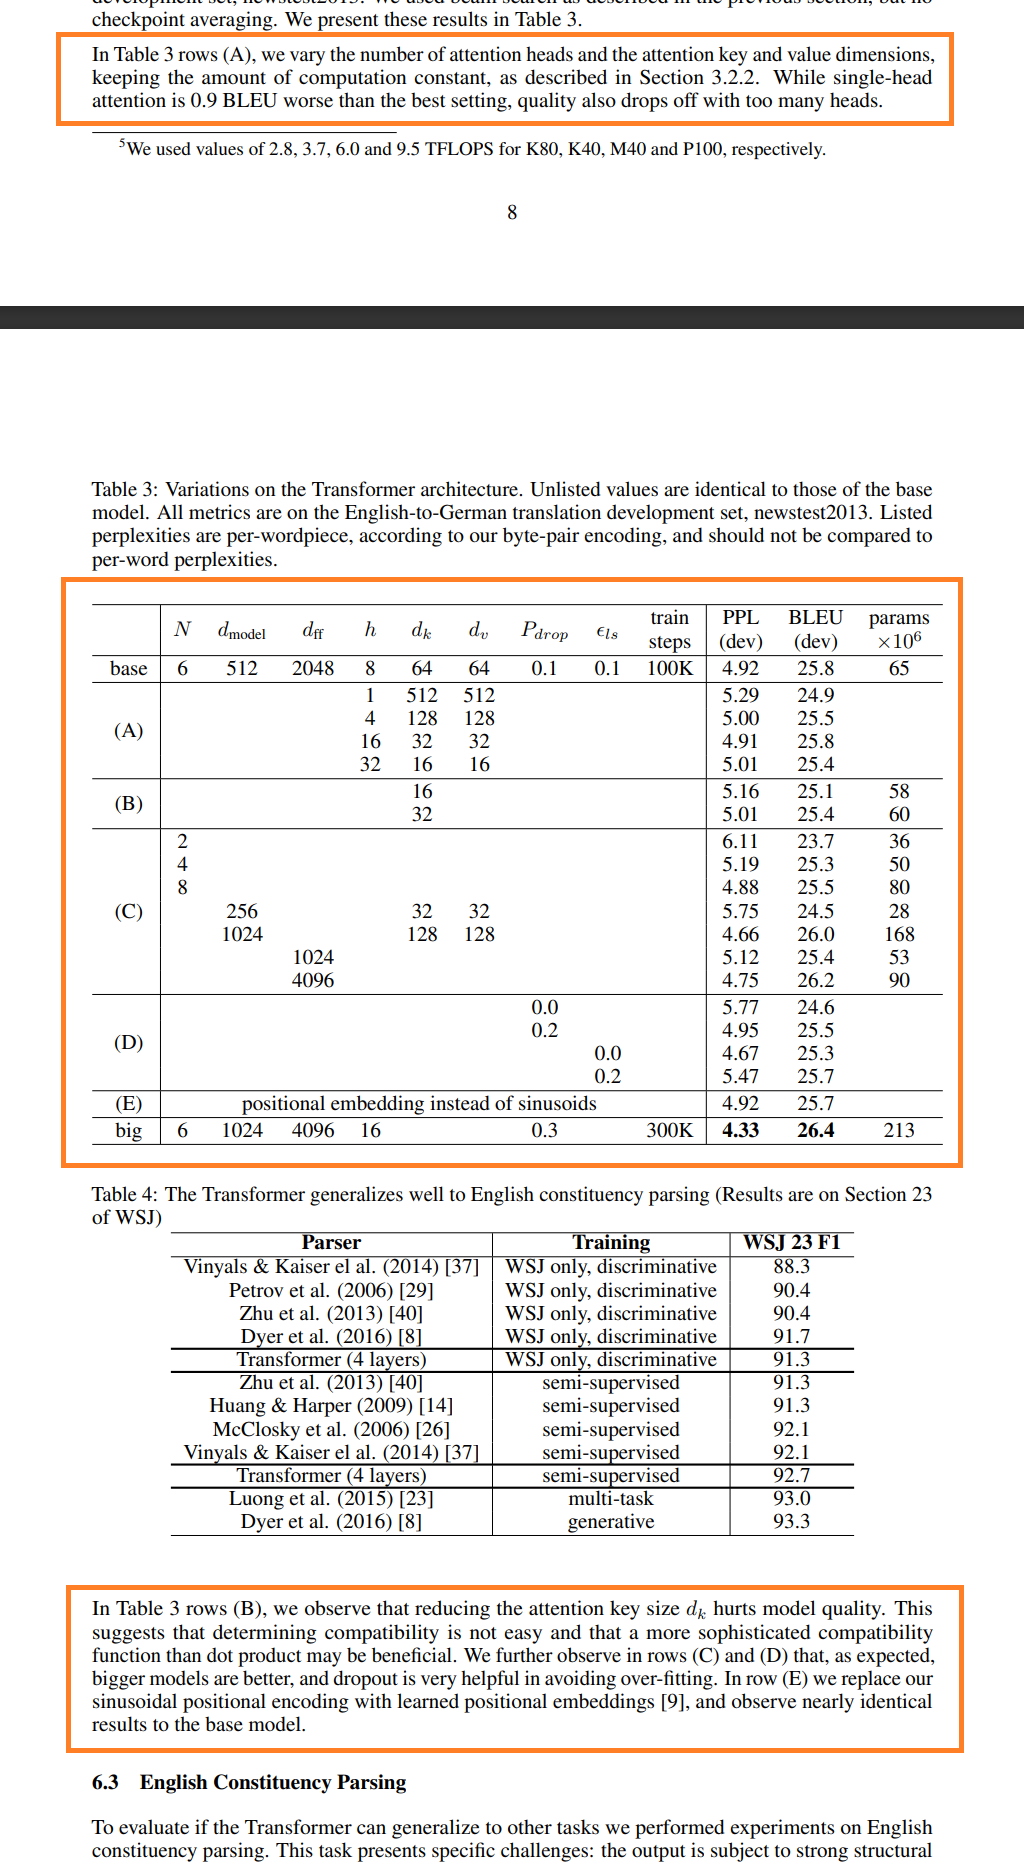

위의 내용을 바탕으로 실험 해 본 결과이다.

모델에서 몇개의 파라메터들을 변경하며 추가 실험을 진행하고 그 결과를 요약한

위의 내용들을 다시 요약하여 정리하면 다음과 같다.

 - (A)：head 가 너무 많으면 성능이 떨어진다.
 
   + NUM_HEADS 를 늘릴수록 loss 값과 accuracy 값에서 손해를 보는 것을 확인 하였다.<br>

&nbsp;

 - (B)：Attention key size $d_k$ 를 줄일수록 모델의 성능이 떨어지는 결과를 확인할 수 있다.
    
    + 논문에서 Attention 부분에서 다루고 있는 내용이다. 여기서는 이 부분은 다루지 않았다.<br>
    
&nbsp;

 - (C), (D)：모델의 크기가 커질수록 좋고, 드롭아웃 으로 과적합을 방지하는게 성능 향상에 도움이 된다.
 
   + D_MODEL 을 키우면서 Dropout 규제도 변화시키면서 훈련을 진행하였다.
   
   + Dropout 의 경우 논문에서는 0.0, 0.2, 0.3(big model) 을 사용하였고, 여기서도 대부분 0.1 ~ 0.3 의 값을 사용하였다.<br>
   
&nbsp;
   
 - (E) 다른 포지셔널 인코딩을 사용해도 성능에 큰 차이는 없다.
 
   + 표에서 (E) 항목에 대해서 특별한 설명은 없고, 여기서도 다른 포지셔널 인코딩 방법이<br>
   무엇이 있으며, 어떻게 적용 해야 할 지 몰랐기 때문에, 이 부분은 적용 및 확인을 못했다.
 

논문 내용에서 확인 할 수 있는 것과 동일한 실험환경은 아니겠지만,

어느정도는 수치적으로 유의미한 측정결과를 확인 할 수 있었다.

다만 느껴지는 챗봇 문장 응답에서는, 그렇게까지 큰 차이를 못느낀다.

수치적으로 확인이 되는 것과, 우리가 느끼는 결과에는 차이가 있는 것 같다.

&nbsp;

마지막으로 임의의 문장을 입력하며 결과를 확인 해 보겠다.

In [122]:
sentence_generation("오늘도 정신없는 하루였네.")

입력 : 오늘도 정신없는 하루였네.
출력 : 힘내세요 .


'힘내세요 .'

In [123]:
sentence_generation("추워죽는줄")

입력 : 추워죽는줄
출력 : 감기 조심하세요 .


'감기 조심하세요 .'

In [124]:
sentence_generation("과제하는데 시간이 너무 오래걸려")

입력 : 과제하는데 시간이 너무 오래걸려
출력 : 연애 초기 데이트를 해보면서 극복해보세요 .


'연애 초기 데이트를 해보면서 극복해보세요 .'

In [125]:
sentence_generation("공기청정기 하나 더 들여 놓았더니 상쾌한 느낌이다")

입력 : 공기청정기 하나 더 들여 놓았더니 상쾌한 느낌이다
출력 : 잘 된 일이에요 .


'잘 된 일이에요 .'

In [126]:
sentence_generation("이따가 저녁 먹으러 나갈꺼야")

입력 : 이따가 저녁 먹으러 나갈꺼야
출력 : 맛 있는거 드세요 .


'맛 있는거 드세요 .'

In [127]:
sentence_generation("친한 동생이 살짝 다쳤대")

입력 : 친한 동생이 살짝 다쳤대
출력 : 순서는 상관 없죠 .


'순서는 상관 없죠 .'

In [128]:
sentence_generation("마지막 스테이지를 못 깨겠어")

입력 : 마지막 스테이지를 못 깨겠어
출력 : 우선 관련 서적을 읽어보세요 .


'우선 관련 서적을 읽어보세요 .'

In [129]:
sentence_generation("오늘은 각잡고 청소좀 해야겠다")

입력 : 오늘은 각잡고 청소좀 해야겠다
출력 : 청소는 습관이에요


'청소는 습관이에요'

In [130]:
sentence_generation("너 좀 친다?")

입력 : 너 좀 친다?
출력 : 모르는 게 잘못인 거 같아요 .


'모르는 게 잘못인 거 같아요 .'

In [131]:
sentence_generation("애플 주식 사도 될까?")

입력 : 애플 주식 사도 될까?
출력 : 주식으로 망하는건 한순간이예요 .


'주식으로 망하는건 한순간이예요 .'

In [132]:
sentence_generation("카드 할부받아서 갤탭 하나 살까?")

입력 : 카드 할부받아서 갤탭 하나 살까?
출력 : 새로 사는 게 마음 편해요 .


'새로 사는 게 마음 편해요 .'

In [133]:
sentence_generation("차에 휴대폰 놓고 왔네")

입력 : 차에 휴대폰 놓고 왔네
출력 : 말해보세요 .


'말해보세요 .'

In [134]:
sentence_generation("내가 아까 저녁에 뭐 하러 나간다고 했었지?")

입력 : 내가 아까 저녁에 뭐 하러 나간다고 했었지?
출력 : 한 번만 더 연락해보는 건 어떨까요 .


'한 번만 더 연락해보는 건 어떨까요 .'

괜찮다면 괜찮은 것일 수 있겠지만…

챗봇이라는 것의 특성상, 동문서답 할 바에야 그냥 ㅡ 그건 잘 모르겠어요 ㅡ 식의 응답이 오도록

처리하는게 좋을것 같다는 생각인데, 거기까지는 쉽게 방법이 떠오르지 않는다.

그리고 내가 챗봇에서 가장 중요하게 생각하는 요소중 하나는, 챗봇과 나눈 대화를 챗봇이 기억을 할 수 있는가 인데,

역시나 여기서도 알 수 있듯, 이전에 나눈 대화에 대한 피드백도 활용한다던지 하는 등의,

유저 입력들도 계속 데이터로 가져가는 기능도 있다면, 조금이라도 더 나은 챗봇이 될 수 있을 것 같다.

부족한 성능 때문에, 이런저런 개선 방안에 대한 아이디어들은 떠오르지만서도, 

지금의 나에게는, 이정도 따라 구현 하는것만도 겨우겨우 완성한 정도인지라, 아직 갈 길이 한참은 멀어 보인다.

이번 프로젝트는 이정도에서 마무리 하도록 하겠다.

&nbsp;

### ■ 프로젝트 회고

#### 1) 이번 프로젝트에서 '어려웠던 점'

이번 프로젝트는 전반적으로 역대급 어려운 내용이었다.

노드에서 학습／실습 부분 컨텐츠는, 논문의 내용을 철저하게 구현하였다고 볼 수 있다.

그것들을 기반으로 내가 프로젝트를 시작하려 하는데, 눈앞이 캄캄해졌었다.

전반적으로 여러번 내용을 읽어 보았지만, 아직도 뭐가 뭔지 정리가 안된다.

계속 반복해서 학습하고, 코드를 따라가면서 약간씩 이해가 되고 있는 와중에,

잠을 자고일어나니, 자고 일어날 때 마다 백지상태가 되어버리는 것이다.

급한 마음에, 트랜스포머 구현에 집중해서 프로젝트를 진행했다.

결과적으로, 다른 것은 큰 문제가 없었을지 모르나, 챗봇의 답변은 동문서답 그 자체였다.

오랜 시간 학습을 수행한 결과가 그렇게 나오니 너무 실망스러웠다.

『챗봇은 그냥 이정도가 한계인 것 같다.』 라고 생각하고 넘어가기에는,

실습 부분에서의 영문 챗봇의 경우 제법 성능이 괜찮았던것이 계속 마음에 걸렸다.

그렇게, 두번이나 크게 뒤엎고 다시하는 사태가 발생했다.

어느정도 납득할 만한 만족스러운 결과를 확인하기까지, 많은 어려움이 있었다.



#### 2) 프로젝트를 진행하면서 본인이 '학습한 내용'

생각만큼 챗봇 퀄리티가 잘 나오지를 않아서 두번을 뒤엎고 다시 작업했다.

어텐션만 사용하던 때 보다 반드시 더 나을거라는 기대가 있었어서 그랬는지

내가 뭔가 크게 잘못을 했을 거라 생각해서, 

노드에서 학습, 실습 부분부터 다시 따오고, 해당 내용을 참고하여, 

코드도 하나둘 씩 정리해나가기 시작했다.

그러면서 그간 진행해놓은 프로젝트의 코드들을 보니

엉망진창에 흐름을 따라가기에 부적합한 구성이었던 것을 알게 되었다.

결국 또 전반적으로 갈아 엎고 프로젝트 부분은 처음부터 다시 시작하게 되었다.

학습, 실습 부분을 노드에서 가져온 부분만 남기고,

나머지 부분들을 하나하나 정리하고, 처리 흐름에 맞게 로직을 다시 배치하고,

함수에 대해서는 블럭 윗 부분에, 코드에 대해서는 주석 부분에,

필요한 내용들을 계속 정리해 가면서 틀을 갖춰나가게 되었다.

대부분은 구현에 충실하도록 노력했지만, 

대부분의 내용에 개념 정리나 코드부분에 설명주석등의 내용도 최대한 많이 작성하였다.

전체 실행했을때 처리 흐름에 맞게 배치 정리도 잘 했고,

그 와중에 코드가 길다보니 주석을 잘못 작성해서 여러번 헷갈려서 힘들긴 했다.

다시 볼 때 헷갈리지 않는 방향으로도 최대한 신경 써서

내가 학습 했던 내용들을 이 프로젝트에 담아내고자 노력했다.

#### 3) 프로젝트를 진행하면서 '알아낸 점' 혹은 '아직 모호한 점'

새롭게 알아낸 점 이라고 할 만한것은 특별히 없다.

트랜스포머에 대한 부분도 아직 학습도 미흡한 상태이다.

대부분 구현에 치중하느라 시간을 많이 소모해서, 부분적으로 이해한 내용들이 대부분이라

프로젝트 과정에서 구현에 필요한 부분들에 대해서만 약간 이해한 수준이다.

모호한 점도 마찬가지로, 대부분 구현에 치중하느라 대부분 메모해 둔 것이 별로 없지만,

논문에서 구현한 하이퍼파라메터나 시간절약을 위해 그보다 더 적은 하이퍼파라메터 적용을 했는데,

이 값들을 상당히 많이 변화시켜보았지만, 이렇다할 유의미한 결과를 확인하지 못했다.

하이퍼파라메터를 통해 더 크게 깊게 레이어를 늘려간다 했을때,

결과에서 차이를 못느끼니, 시간만 더 걸리는것 같다는 느낌을 지울수가 없었다.

불용어 제거 과정등을 수행하지 않았음에도 이정도면 괜찮은 성능이라고 할 수 있을지도 모르지만,

개인적으로는 만족스럽지 못한 결과들이라고 생각이다.

데이터가 더 많으면 유리할 것 같은 느낌도 있지만, 

최소한 A 와 B 의 응답내용이 한 쌍으로 준비된 데이터를 구해야 하는데,

마땅히 적합한 데이터를 구할 곳이 떠오르지 않았다.

그리고 이미 훈련에 시간을 많이 소모해서, 

혹시 단어사전의 크기를 25％ 가량 키운 영향도 클까 싶기도 한데,

다시 수행하자니 위험부담이 제법 있어서, 아쉽지만 지금 결과에서 멈춰야 할 것 같다.

#### 4) 루브릭 평가 지표를 맞추기 위해 '시도한 것들'

루브릭 평가 지표에 해당하는 내용들이, 

트랜스포머 챗봇의 구현과정에 이미 포함되어 있기 때문에,

특별히 지표를 맞추기 위해 더 시도한 것들은 없다.

트랜스포머 모델 구현부터 난이도가 상당히 높다고 생각하는데,

그러한 이유로 루브릭 평가 지표의 항목들이 대부분 구현안에 포함되어 있는게 아닐까 생각했다.

구현하는 과정에서 데이터 전처리와 어텐션-트랜스포머의 구조, 인코더-디코더 설계 등

여러가지 개념들이 갑자기 쏟아져 나와서, 그것들만으로도 충분히 정신없었다.

다른 자료들을 보면, 대부분 비슷한 방향성(논문 내용에 충실, 우리말 챗봇 데이터 동일)을

따라서 구현을 하고 있었는데, 나 역시 어쩔 수 없는 상황이었던 것 같다.

겨우겨우 구현하고 일부 내용정리 하는 정도였는데, 그나마 루브릭이라도 고생을 덜어준듯 하여 다행이라는 생각이다.

#### 5) 만약에 '루브릭 평가 지표를 달성하지 못했을 때, 이유에 관한 추정'

트랜스포머 모델을 구현하는 과정에서 심각한 문제가 있다면, 결과가 엉망일 것이다.

따라서 루브릭 평가 지표 달성에 문제가 클 것이라고 생각한다.

실제로 두번을 크게 뒤엎는 과정에서, 첫번째 뒤엎었을때에 그러한 문제가 있었다.

결과 문장이 말이 안되는 내용 뿐이었는데, 특히, 같은 단어가 여러번 반복되는 현상이 대부분이었다.

동문서답이야 어느정도는 그럴수도 있다고 이해하겠는데, 분명 문제가 있다고 뚜렷하게 확인 할 수 있었다.

이전에 영어 문장일때 실행했던 필수 함수들 일부를 다시 제대로 구현 안하고 넘어갔던것이 문제였던 것이었다.

이러한 상황이, 루브릭 평가지표를 달성할 수 없는 이유가 될 수 있을 것 같다.

구현을 충실히 수행했다면, 아마 그러한 문제는 겪지 않을 것이고,

문제가 발생 했더라도 그것을 잘 해결하여, 온전하게 트랜스포머 모델을 구현 했다면,

결과적으로는 루브릭 평가지표 달성에도 문제가 없을 것이라고 생각한다.

#### 6) 자기 다짐

두번째에 뒤엎을때는 망하는거 아닌가 하는 생각이 들었었다.

첫번째 뒤엎을때의 문제를 바로잡았을때, 어느정도 구현한 것에는 문제가 없다는 생각이 들었지만,

학습을 돌리려고 블럭들을 Run 하다보니, 그 과정에서 코드블럭의 순서라던가 구성이

너무 난해하게 배치되어 있는 것 같아서, 한번 더 뒤집어 엎고 새로 만들게 되었다.

그러한 과정에서 부족하거나 놓친 것들도 약간 보충할 수 있었다.

코드 블럭들을 로직에 따라 다시 정리하고, 각각의 구성요소에 대한 설명이나 요약문구들,

그리고 코드에 대한 주석들을 작성하고 나니 이전에 봐도 하나도 모르겠는 그림들이

다시보니 조금씩 이해가 되기 시작했다. 후반부의 훈련 결과에 대한 정리를 어떻게 할 지

계획하는 것에도 도움이 보였어서, 정말 크게 망했다가 기사회생한 느낌이다.

그렇다 하더라도, 결과적으로 본인의 트랜스포머에 대한 이해도가 너무 낮은 상태라 아쉬움이 크다.

이번 노드의 학습부분 만으로는 이해하기에 쉽지 않은 것 같다.

이러한 모델을 다시 구현한다면 지금상태로는 거의 원형을 유지한 베이스라인을 벗어나기는 힘들것 같다.

필요한 내용들은 다 수행하긴 했지만, 시간이 부족함과 나의 지능에 대한 아쉬움이 많이 남는다.

솔직히 트랜스포머에 대한 내용은, 상당히 중요하다는 점이 느낌 왔는데,

중요하다는 걸 알고도 내가 부족해서 이해를 못했다는 사실을 알고 인정하는 부분이다.

물론 내용이 어렵기도 어렵지만, 노드 내용자체는 부실한게 아니라, 오히려 충실했다고 생각한다.

나 스스로 RNN 과 어텐션에 대해서 더 확실히 알고 넘어갔었어야 했고,

트랜스포머에 대해서도 더 공부를 했었어야 했는데, 그렇지 못한 결과라고 생각한다.

부족한 부분들을 잘 알지만서도, 결국 이번에도 또 미뤄둘 수 밖에 없는 상황이라 상당히 아쉽다.

아무래도 트랜스포머는 어텐션과 함께, 나중에 처음부터 다시 공부해야 할 것 같다.

<hr>

## ◎ Reference

- (AIFFEL) Exploration Project Node 10. 번역기를 만들어보자


- (AIFFEL) Exploration Project Node 12. 뉴스 요약봇 만들기


- (AIFFEL) Exploration Project Node 14. 뉴스 요약봇 만들기


- (ChatBot) [챗봇의 5가지 대표 유형/종류](https://tonyaround.com/%ec%b1%97%eb%b4%87-%ea%b8%b0%ed%9a%8d-%eb%8b%a8%ea%b3%84-%ec%b1%97%eb%b4%87%ec%9d%98-5%ea%b0%80%ec%a7%80-%eb%8c%80%ed%91%9c-%ec%9c%a0%ed%98%95-%ec%a2%85%eb%a5%98/)


- (ChatBot) [인공지능 챗봇(Chatbot), 챗봇 역사의 모든 것](https://blog.performars.com/ko/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5-%EC%B1%97%EB%B4%87chatbot-%EC%B1%97%EB%B4%87-%EC%97%AD%EC%82%AC%EC%9D%98-%EB%AA%A8%EB%93%A0-%EA%B2%83)


- (Transformer) [A Novel Neural Network Architecture for Language Understanding](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)


- (RNNLM) [RNN 언어 모델(Recurrent Neural Network Language Model, RNNLM)](https://wikidocs.net/46496)


- (Paper) [Attention Is All You Need](https://arxiv.org/pdf/1706.03762)


- (Transformer) [attention is all you need 한글 번역](https://sulung-sulung.tistory.com/8)


- (Transformer) [Transformers Explained Visually (Part 3): Multi-head Attention, deep dive](https://towardsdatascience.com/transformers-explained-visually-part-3-multi-head-attention-deep-dive-1c1ff1024853)


- (한국어 ChatBot) [Chatbot_data_for_Korean v1.0](https://github.com/songys/Chatbot_data)


- (한국어 ChatBot) [Korean Language Model for Wellness Conversation](https://github.com/nawnoes/WellnessConversation-LanguageModel)


- (Transformer) [딥 러닝을 이용한 자연어 처리 입문 - 트랜스포머(Transformer)](https://wikidocs.net/31379)


- (ChatBot) [최강 챗봇 등장! 구글 람다(LaMDA)](https://jiho-ml.com/weekly-nlp-50/)

<hr>